In [1]:
"""
    Importeer libraries
    """
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree
from math import sqrt, ceil
from scipy.stats import linregress    
import libraries as lib
import math 
    

In [2]:
# Set Lees GPS data met hoogte-data in
"""
    Maak dataframe  met hoogte data.

    Parameters:
        file_path: directory van het bestand met hoogteprofiel

    Returns:
        DataFrame: Het dataframe met hoogte data.
    """

file_path = "/Users/willemheemskerk/Downloads/20230525_h2a_poging1/0002/Data voor hoogteprofiel.txt"

# Read GPS data
hoogte_df = lib.lees_gps_data(file_path)

# Print the resulting DataFrame
hoogte_df


timestamp   latitude lat_direction  longitude lon_direction  hoogte  \
0      063448.30  43.771393             N  -0.042098             W    99.5   
1      063448.40  43.771393             N  -0.042098             W    99.5   
2      063448.50  43.771393             N  -0.042098             W    99.4   
3      063448.60  43.771393             N  -0.042098             W    99.5   
4      063448.70  43.771393             N  -0.042098             W    99.4   
...          ...        ...           ...        ...           ...     ...   
46568       None  43.771202             N  -0.041941             W    96.0   
46569       None  43.771202             N  -0.041941             W    96.0   
46570       None  43.771202             N  -0.041941             W    96.1   
46571       None  43.771202             N  -0.041941             W    96.1   
46572       None  43.771202             N  -0.041941             W    96.2   

       speed_m/s  
0       0.038583  
1       0.026237  
2       0.035497  
3       0.073051  
4       0.064820  
...          ...  
46568        NaN  
46569        NaN  
46570        NaN  
46571        NaN  
46572        NaN  

[46573 rows x 7 columns]

In [3]:
#Filter vanaf het moment dat de auto de baan opgaat en wanneer die er weer afgaat.
"""
    Filter de data handmatig vanaf een opgegeven startrij tot een opgegeven eindrij.

    Parameters:
        data_file_motordriver (DataFrame): Het originele DataFrame.
        start_row (int): Het indexnummer van de rij waarmee het filteren moet beginnen.
        end_row (int): Het indexnummer van de rij waarmee het filteren moet eindigen.

    Returns:
        DataFrame: Het gefilterde DataFrame vanaf start_row tot end_row.
    """
# Definieer de coördinaten voor het start- en eindpunt
start_lon = -0.0446
start_lat = 0.00095 + 4.3771e1
end_lon = -0.039925
end_lat = 0.000300 + 4.3771e1

# Veronderstel dat 'df' je DataFrame is met de relevante data
filtered_hoogte_df = lib.filter_track_data(hoogte_df, start_lon, start_lat, end_lon, end_lat)

# Print het gefilterde DataFrame om te controleren
filtered_hoogte_df
#43.767914, -0.035855

timestamp   latitude lat_direction  longitude lon_direction  hoogte  \
22340  071203.60  43.771951             N  -0.044597             W   102.0   
22341  071203.70  43.771954             N  -0.044603             W   102.0   
22342  071203.80  43.771955             N  -0.044609             W   102.0   
22343  071203.90  43.771958             N  -0.044616             W   102.0   
22344  071204.00  43.771960             N  -0.044622             W   102.0   
...          ...        ...           ...        ...           ...     ...   
42943  074720.40  43.771037             N  -0.040149             W    98.1   
42944  074720.50  43.771032             N  -0.040142             W    98.1   
42945  074720.60  43.771027             N  -0.040135             W    98.1   
42946  074720.70  43.771022             N  -0.040127             W    98.1   
42947  074720.80  43.771017             N  -0.040120             W    98.1   

       speed_m/s  
22340   5.597156  
22341   5.624421  
22342   5.633167  
22343   5.650143  
22344   5.655288  
...          ...  
42943   8.270209  
42944   8.298503  
42945   8.276382  
42946   8.287700  
42947   8.273810  

[20608 rows x 7 columns]

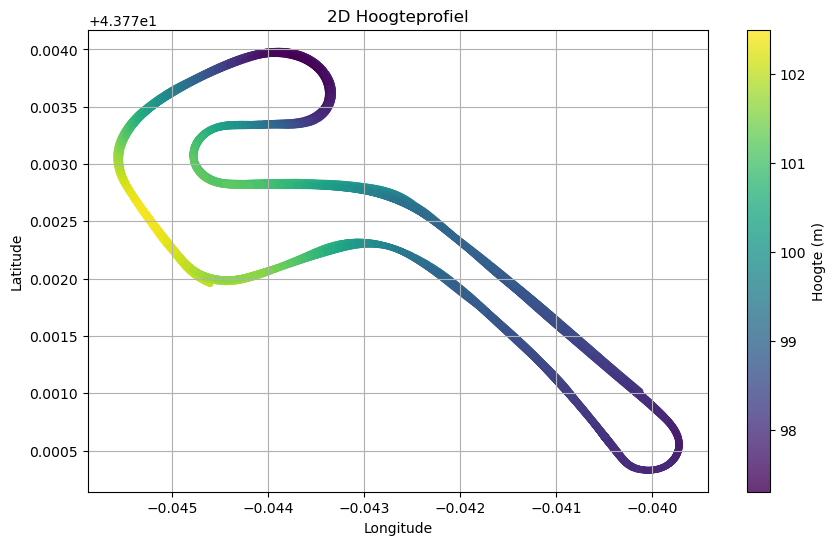

In [4]:
# Maak hoogteprofiel van de baan
"""
    Visualiseert het hoogteprofiel van de racebaan.

    Parameters:
    latitudes (pd.Series of list): Lijst of Pandas Series met breedtegraden van de meetpunten.
    longitudes (pd.Series of list): Lijst of Pandas Series met lengtegraden van de meetpunten.
    hoogtes (pd.Series of list): Lijst of Pandas Series met hoogtes boven zeeniveau van de meetpunten.

    Returns:
    None
    """
lib.plot_height_profile(filtered_hoogte_df['latitude'], filtered_hoogte_df['longitude'], filtered_hoogte_df['hoogte'])


Indices van punten in de twee gebieden: [962, 1282, 3058, 3356, 5066, 5370, 7068, 7372, 9238, 9561, 11378, 11698, 13580, 13908, 15782, 16107, 18039, 18370, 20317]


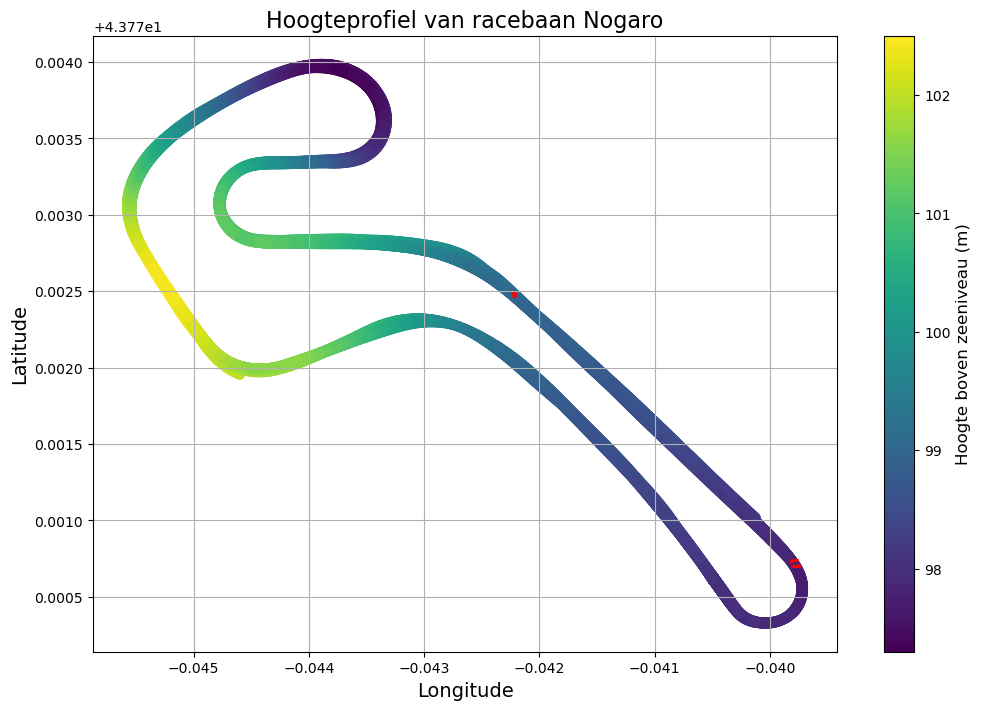

In [5]:
#Zoekt de rijen van stukken die je wilt definiëren, eerste index is begin, 2e index is eind.
"""
    Identificeert de indices van rijen in de DataFrame die binnen twee opgegeven rechthoekige gebieden vallen.

    Parameters:
    df (DataFrame): De DataFrame met 'latitude' en 'longitude' kolommen.
    lat_min1, lat_max1, lon_min1, lon_max1: Coördinaten van het eerste gebied.
    lat_min2, lat_max2, lon_min2, lon_max2: Coördinaten van het tweede gebied.

    Returns:
    list: Lijst met indices van de rijen die binnen de opgegeven gebieden vallen.
    """
lat_min1, lat_max1 = 7e-5 + 4.37724e1, 8.6e-5 + 4.37724e1
lon_min1, lon_max1 = -0.04224, -0.04221

lat_min2, lat_max2 = 70e-5 + 4.377e1, 74e-5 + 4.377e1
lon_min2, lon_max2 = -0.03982, -0.03975

indices = lib.vind_rijen(
    filtered_hoogte_df,
    lat_min1, lat_max1, lon_min1, lon_max1,
    lat_min2, lat_max2, lon_min2, lon_max2
)
print("Indices van punten in de twee gebieden:", indices)

# plot de boxes in de figuur
"""
    Visualiseert het hoogteprofiel van een racebaan met aangegeven rechthoekige gebieden.

    Parameters:
    latitudes (pd.Series of list): Lijst of Pandas Series met breedtegraden van de meetpunten.
    longitudes (pd.Series of list): Lijst of Pandas Series met lengtegraden van de meetpunten.
    hoogtes (pd.Series of list): Lijst of Pandas Series met hoogtes boven zeeniveau van de meetpunten.
    lat_min1, lat_max1, lon_min1, lon_max1 (float): Coördinaten die de grenzen van het eerste rechthoekige gebied definiëren.
    lat_min2, lat_max2, lon_min2, lon_max2 (float): Coördinaten die de grenzen van het tweede rechthoekige gebied definiëren.

    Functionaliteit:
    - Maakt een scatterplot van de opgegeven GPS-coördinaten, gekleurd op basis van hoogte.
    - Geeft twee rechthoekige gebieden weer op de kaart met rode stippellijnen.
    - Voegt een kleurenschaal toe om de hoogtewaarden te interpreteren.
    - Voorziet de plot van titels en labels voor duidelijkheid.

    Returns:
    None
    """
lib.plot_height_profile_with_boxes(filtered_hoogte_df['latitude'], filtered_hoogte_df['longitude'],filtered_hoogte_df['hoogte'], 
lat_min1, lat_max1, lon_min1, lon_max1,
lat_min2, lat_max2, lon_min2, lon_max2)


In [84]:
#Maak een df met de hoogte en afstand toegevoegd (voor maken hoogteprofiel fit)
"""
    Selecteer een subset van de DataFrame op basis van het opgegeven indexbereik,
    verwijder de kolom 'speed(m/s)', bereken de Haversine-afstand en het hoogteverschil
    tussen opeenvolgende rijen, en voeg deze als nieuwe kolommen toe aan het subset.

    Parameters:
    df (DataFrame): De oorspronkelijke DataFrame met de kolommen 'latitude', 'longitude',
                    'lat_direction', 'lon_direction', 'hoogte' en 'speed(m/s)'.
    start_index (int): De startindex van de rijen die moeten worden verwerkt.
    eind_index (int): De eindindex (inclusief) van de rijen die moeten worden verwerkt.

    Returns:
    DataFrame: Een subset van de oorspronkelijke DataFrame zonder de kolom 'speed(m/s)' en met
               extra kolommen 'afstand', 'hoogteverschil', 'cumulatieve_afstand' en
               'cumulatief_hoogteverschil'.
    """
start_index = 25271
eind_index = 25710

start_index2 = 35194
eind_index2 = 35352

start_index3 = 33587
eind_index3 = 34038

start_index4 = 31513
eind_index4 = 31908

start_index5 = 31527
eind_index5 = 31909

hoogte_met_afstand_df = lib.bereken_afstand_en_hoogteverschil(filtered_hoogte_df, start_index, eind_index)

hoogte_met_afstand_df2 = lib.bereken_afstand_en_hoogteverschil(filtered_hoogte_df, start_index2, eind_index2)

hoogte_met_afstand_df3 = lib.bereken_afstand_en_hoogteverschil(filtered_hoogte_df, start_index3, eind_index3)

hoogte_met_afstand_df4 = lib.bereken_afstand_en_hoogteverschil(filtered_hoogte_df, start_index4, eind_index4)

hoogte_met_afstand_df5 = lib.bereken_afstand_en_hoogteverschil(filtered_hoogte_df, start_index5, eind_index5)




In [38]:
hoogte_met_afstand_df3

timestamp   latitude lat_direction  longitude lon_direction  hoogte  \
33587  073140.00  43.772839             N  -0.043487             W   100.5   
33588  073140.10  43.772839             N  -0.043477             W   100.5   
33589  073140.20  43.772838             N  -0.043466             W   100.5   
33590  073140.30  43.772838             N  -0.043456             W   100.5   
33591  073140.40  43.772838             N  -0.043446             W   100.5   
...          ...        ...           ...        ...           ...     ...   
34034  073225.30  43.770760             N  -0.039828             W    97.9   
34035  073225.40  43.770754             N  -0.039821             W    97.9   
34036  073225.50  43.770748             N  -0.039815             W    97.9   
34037  073225.60  43.770743             N  -0.039809             W    97.9   
34038  073225.70  43.770737             N  -0.039803             W    97.8   

        afstand  hoogteverschil  cumulatieve_afstand  \
33587  0.000000             0.0             0.000000   
33588  0.829690             0.0             0.829690   
33589  0.829897             0.0             1.659586   
33590  0.829690             0.0             2.489276   
33591  0.829897             0.0             3.319173   
...         ...             ...                  ...   
34034  0.818188             0.0           384.693950   
34035  0.809717             0.0           385.503667   
34036  0.801380             0.0           386.305048   
34037  0.793181             0.0           387.098229   
34038  0.807982            -0.1           387.906210   

       cumulatief_hoogteverschil  
33587                        0.0  
33588                        0.0  
33589                        0.0  
33590                        0.0  
33591                        0.0  
...                          ...  
34034                       -2.6  
34035                       -2.6  
34036                       -2.6  
34037                       -2.6  
34038                       -2.7  

[452 rows x 10 columns]

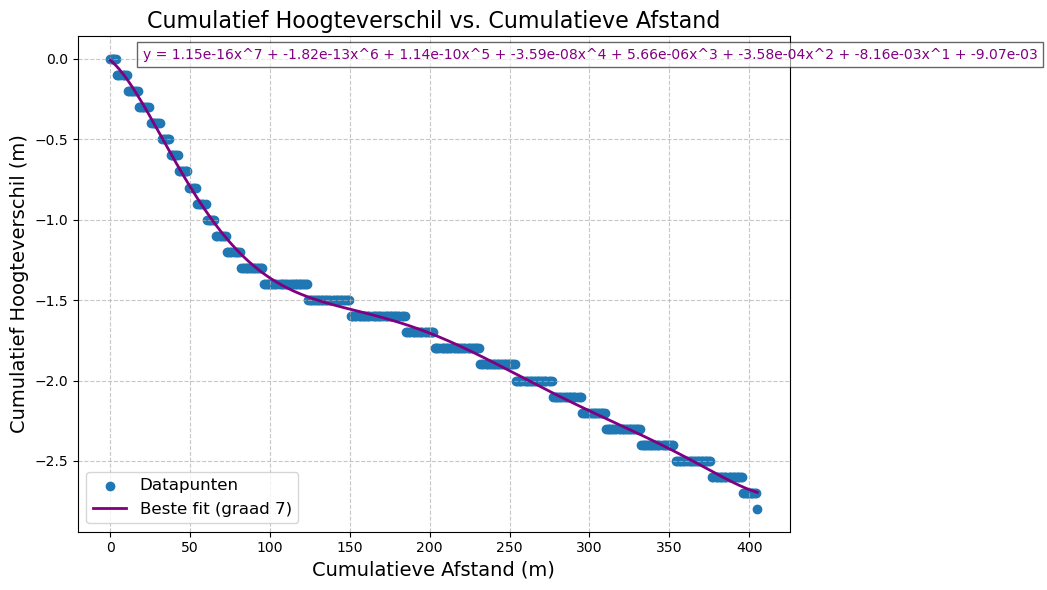

y = 1.15e-16x^7 + -1.82e-13x^6 + 1.14e-10x^5 + -3.59e-08x^4 + 5.66e-06x^3 + -3.58e-04x^2 + -8.16e-03x^1 + -9.07e-03


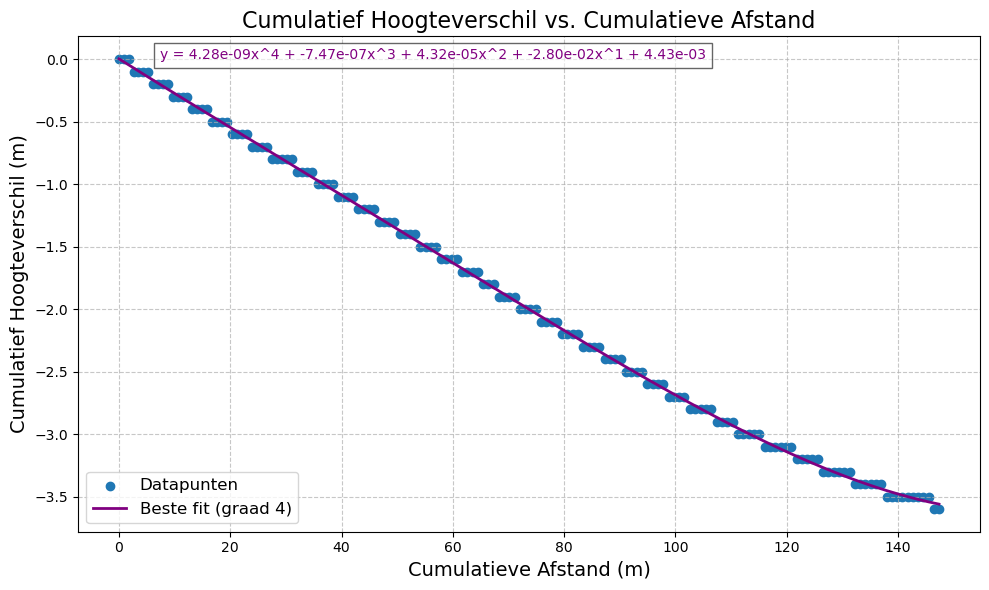

y = 4.28e-09x^4 + -7.47e-07x^3 + 4.32e-05x^2 + -2.80e-02x^1 + 4.43e-03


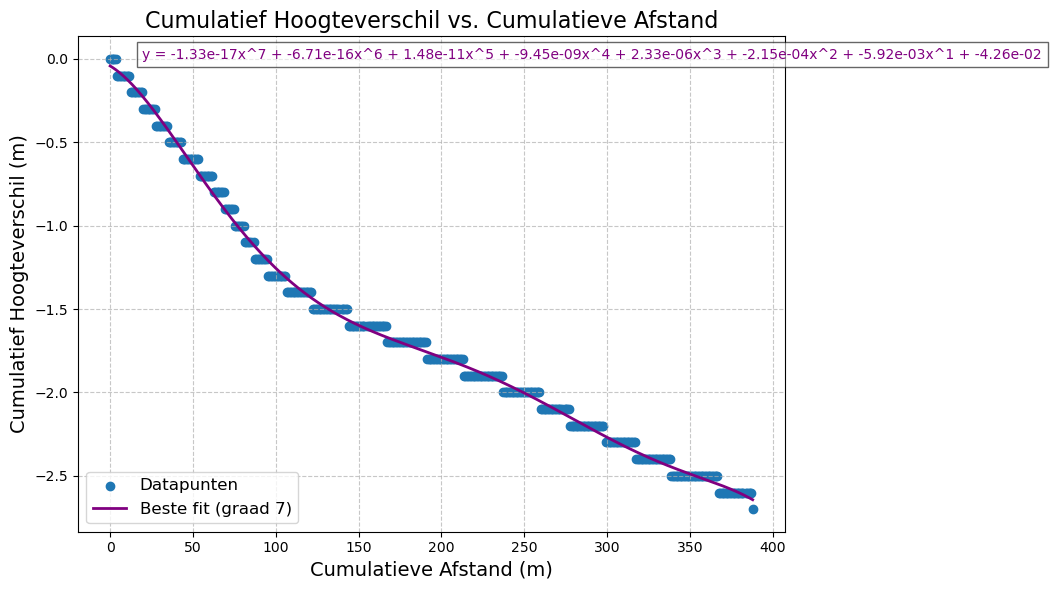

y = -1.33e-17x^7 + -6.71e-16x^6 + 1.48e-11x^5 + -9.45e-09x^4 + 2.33e-06x^3 + -2.15e-04x^2 + -5.92e-03x^1 + -4.26e-02


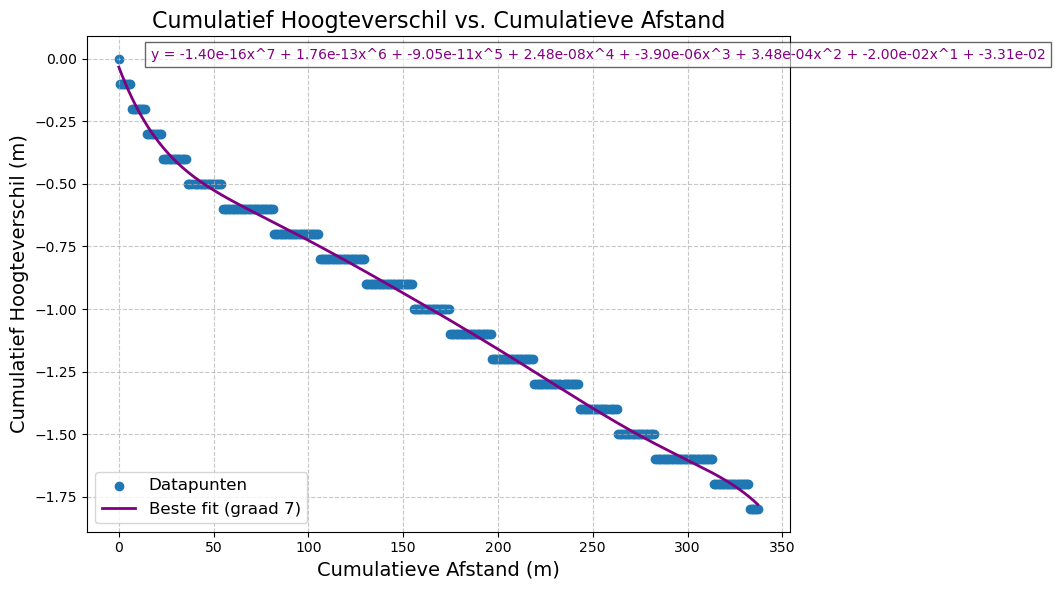

y = -1.40e-16x^7 + 1.76e-13x^6 + -9.05e-11x^5 + 2.48e-08x^4 + -3.90e-06x^3 + 3.48e-04x^2 + -2.00e-02x^1 + -3.31e-02


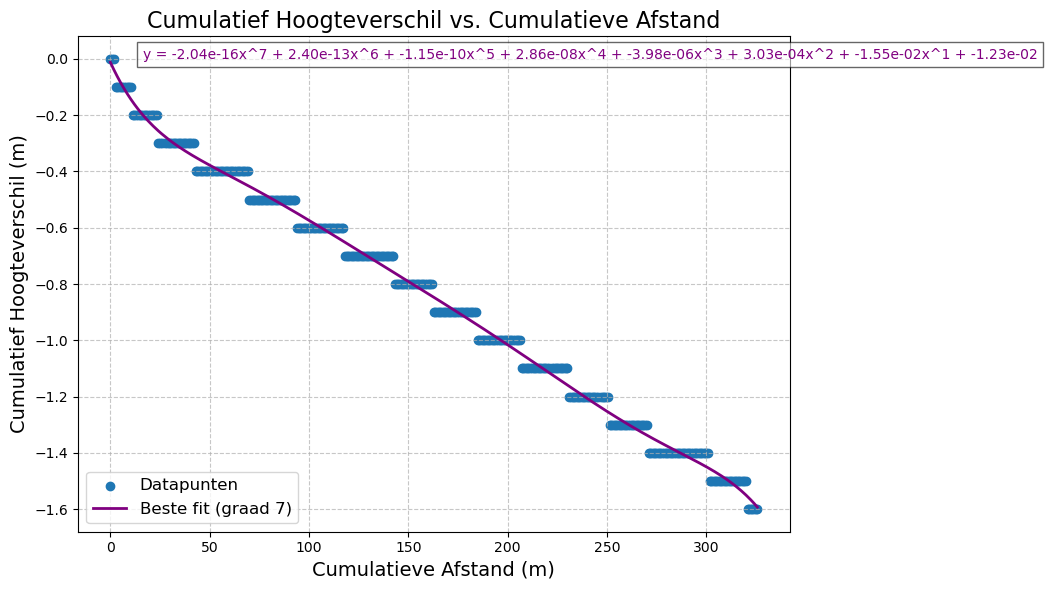

y = -2.04e-16x^7 + 2.40e-13x^6 + -1.15e-10x^5 + 2.86e-08x^4 + -3.98e-06x^3 + 3.03e-04x^2 + -1.55e-02x^1 + -1.23e-02


In [85]:
#Maak een fitvergelijking voor het hoogteprofiel van dit df
#Voeg de polynoom in
"""
    Parameters:
    dataframe (pd.DataFrame): DataFrame met de kolommen 'cumulatieve_afstand' en 'cumulatief_hoogteverschil'.
    polynoom_graad (int): De graad van de polynoom die aan de data wordt aangepast.
"""

polynomial = lib.plot_hoogte_vs_afstand_met_fit(hoogte_met_afstand_df, 7)

polynomial2 = lib.plot_hoogte_vs_afstand_met_fit(hoogte_met_afstand_df2, 4)

polynomial3 = lib.plot_hoogte_vs_afstand_met_fit(hoogte_met_afstand_df3, 7)

polynomial4 = lib.plot_hoogte_vs_afstand_met_fit(hoogte_met_afstand_df4, 7)

polynomial5 = lib.plot_hoogte_vs_afstand_met_fit(hoogte_met_afstand_df5, 7)


In [11]:
"""
    Laadt motordriver-data in, selecteert een subset van rijen, corrigeert GPS-coördinaten
    en voegt snelheden in m/s toe.

    Parameters:
    directory (str): Pad naar de directory met het databestand.
    file_motordriver (str): Naam van het motordriver-databestand.
    start_row (int): Startindex van de te selecteren rijen (inclusief).
    end_row (int): Eindindex van de te selecteren rijen (inclusief).

    Returns:
    pd.DataFrame: Geprocessed DataFrame met geselecteerde rijen, gecorrigeerde GPS-coördinaten
                  en snelheden in m/s.
    """

directory = "/Users/willemheemskerk/Downloads/20230525_h2a_poging1/0002/"
file_motordriver = "5.csv"
start_row = 223257
end_row = 479444

filtered_motordriver = lib.verwerk_motordriver_data(directory, file_motordriver, start_row, end_row)
filtered_motordriver

Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
223257                5             4540.1490                  03|04   
223258                5             4540.1571                  03|04   
223259                5             4540.1652                  03|04   
223260                5             4540.1734                  03|04   
223261                5             4540.1815                  03|04   
...                 ...                   ...                    ...   
479440                5             6774.8277                  03|04   
479441                5             6774.8364                  03|04   
479442                5             6774.8451                  03|04   
479443                5             6774.8538                  03|04   
479444                5             6774.8625                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
223257                                     898.7554   
223258                                     898.7634   
223259                                     898.7716   
223260                                     898.7796   
223261                                     898.7878   
...                                             ...   
479440                                    3133.0471   
479441                                    3133.0559   
479442                                    3133.0647   
479443                                    3133.0735   
479444                                    3133.0820   

        Spanning over de motor (V)  Stroom door de motor (A)  \
223257                       2.689                     9.883   
223258                       3.127                    10.037   
223259                       3.702                    10.203   
223260                       3.541                    10.329   
223261                       3.242                    10.222   
...                            ...                       ...   
479440                       0.021                    -0.085   
479441                       0.020                    -0.084   
479442                       0.020                    -0.084   
479443                       0.020                    -0.083   
479444                       0.020                    -0.084   

        Vermogen geleverd aan de motor (W)  \
223257                                36.8   
223258                                43.2   
223259                                51.8   
223260                                50.1   
223261                                46.2   
...                                    ...   
479440                                -0.0   
479441                                -0.0   
479442                                -0.0   
479443                                -0.0   
479444                                -0.0   

        Energie geleverd aan de motor sinds reset (J)  \
223257                                          -1340   
223258                                          -1340   
223259                                          -1339   
223260                                          -1339   
223261                                          -1339   
...                                               ...   
479440                                         181490   
479441                                         181490   
479442                                         181490   
479443                                         181490   
479444                                         181490   

        Spanning aan de ingang van motordriver (V)  \
223257                                      31.898   
223258                                      31.894   
223259                                      31.889   
223260                                      31.889   
223261                                      31.894   
...                                            ...   
479440                                      30.445   
479441                                     

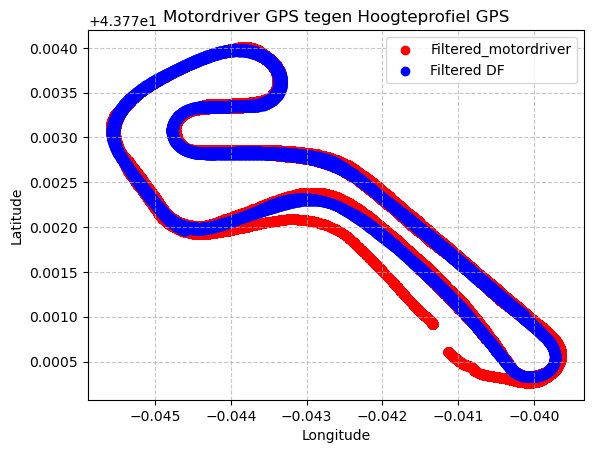

In [12]:
"""
    Laadt de GPS data van de motordriver tegen die van het hoogte df om te checken of het overeenkomt.
    """

plt.title('Motordriver GPS tegen Hoogteprofiel GPS')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(filtered_motordriver['GPS longitude, in graden'], filtered_motordriver['GPS latitude, in graden'], color ='r', label= 'Filtered_motordriver')
plt.scatter(filtered_hoogte_df['longitude'], filtered_hoogte_df['latitude'], color='b', label='Filtered DF')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
"""
    Maak apparte dataframes van elke ronde.
        """


#Maken df's per ronde motordriver
begin_eind_paren2 = [
    (0, 26251), 
    (26251, 49486), 
    (49486, 74393), 
    (74393, 100200),
    (100200, 124732), 
    (124732, 149852), 
    (149852, 174488), 
    (174488, 200208),
    (200208, 226012), 
    (226012, 255494)
]

# Maak een lege lijst om de rondes-dataframes op te slaan
rondes = []

# Loop door elke (begin, eind) paar en maak een DataFrame subset
for i, (begin, eind) in enumerate(begin_eind_paren2):
    df_segment = filtered_motordriver.iloc[begin:eind]
    rondes.append(df_segment)

# Je kunt nu elke ronde benaderen als rondes[0], rondes[1], etc.
df_ronde1 = rondes[0]
df_ronde2 = rondes[1]
df_ronde3 = rondes[2]
df_ronde4 = rondes[3]
df_ronde5 = rondes[4]
df_ronde6 = rondes[5]
df_ronde7 = rondes[6]
df_ronde8 = rondes[7]
df_ronde9 = rondes[8]
df_ronde10 = rondes[9]

# Print het resultaat voor een ronde om te controleren
df_ronde7


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
373109                5             5837.5808                  03|04   
373110                5             5837.5896                  03|04   
373111                5             5837.5984                  03|04   
373112                5             5837.6073                  03|04   
373113                5             5837.6161                  03|04   
...                 ...                   ...                    ...   
397740                5             6054.6428                  03|04   
397741                5             6054.6516                  03|04   
397742                5             6054.6605                  03|04   
397743                5             6054.6694                  03|04   
397744                5             6054.6783                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
373109                                    2195.9629   
373110                                    2195.9717   
373111                                    2195.9807   
373112                                    2195.9895   
373113                                    2195.9983   
...                                             ...   
397740                                    2412.9873   
397741                                    2412.9961   
397742                                    2413.0049   
397743                                    2413.0139   
397744                                    2413.0227   

        Spanning over de motor (V)  Stroom door de motor (A)  \
373109                      21.155                     7.969   
373110                      20.881                     7.951   
373111                      20.706                     7.930   
373112                      20.995                     8.003   
373113                      20.981                     8.040   
...                            ...                       ...   
397740                      20.286                     8.068   
397741                      20.145                     7.973   
397742                      20.052                     8.024   
397743                      19.878                     7.993   
397744                      19.690                     8.001   

        Vermogen geleverd aan de motor (W)  \
373109                               180.1   
373110                               176.7   
373111                               175.4   
373112                               179.2   
373113                               180.1   
...                                    ...   
397740                               175.6   
397741                               172.4   
397742                               173.3   
397743                               171.0   
397744                               169.8   

        Energie geleverd aan de motor sinds reset (J)  \
373109                                         114188   
373110                                         114189   
373111                                         114191   
373112                                         114193   
373113                                         114194   
...                                               ...   
397740                                         132123   
397741                                         132125   
397742                                         132126   
397743                                         132128   
397744                                         132129   

        Spanning aan de ingang van motordriver (V)  \
373109                                      27.357   
373110                                      27.356   
373111                                      27.356   
373112                                      27.355   
373113                                      27.354   
...                                            ...   
397740                                      27.457   
397741                                     

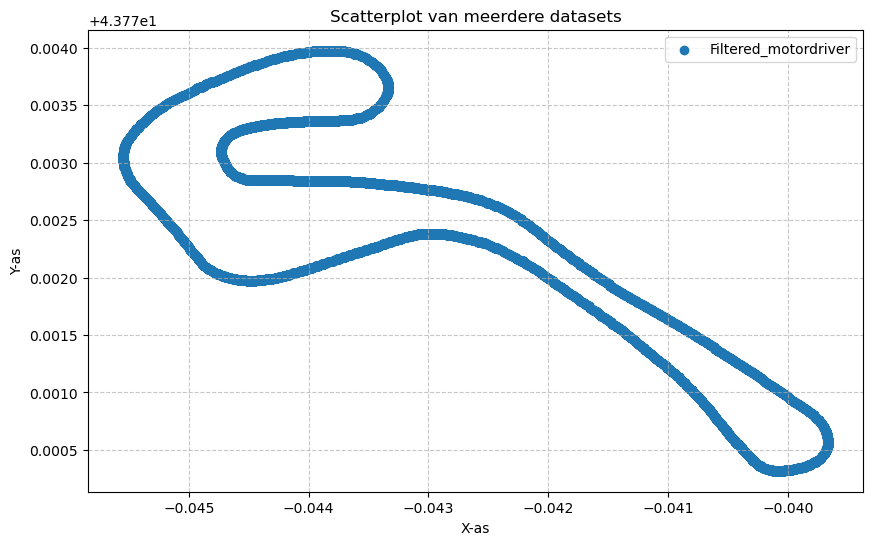

In [14]:
"""
    Maakt een scatterplot van de opgegeven DataFrame-kolommen met een specifiek label.

    Parameters:
    df (pd.DataFrame): De DataFrame met de te plotten data.
    x_col (str): De naam van de kolom voor de x-as.
    y_col (str): De naam van de kolom voor de y-as.
    label (str): Het label voor de dataset in de plot.

    Returns:
    None
    """

# Stel dat 'df_ronde6' de DataFrame is met de benodigde data
lib.plot_scatter((df_ronde8, 'GPS longitude, in graden', 'GPS latitude, in graden', 'Filtered_motordriver'))




In [83]:
"""
    Maakt een scatterplot met Plotly waarbij bij hoveren de rij-index en de x- en y-waarden worden weergegeven,
    en voegt optioneel handmatig opgegeven punten toe op specifieke coördinaten.

    Parameters:
    df (pd.DataFrame): De DataFrame met de te plotten data.
    x_col (str): De naam van de kolom voor de x-as.
    y_col (str): De naam van de kolom voor de y-as.
    label (str): Het label voor de dataset in de plot.
    custom_points (list of tuples, optional): Lijst met tuples, elk met (x, y) coördinaten voor de toe te voegen punten. Standaard is None.

    Returns:
    None
    """

custom_points = [(-0.043588, 43.772817), # filtered_motordriver.loc[388561]
                 (-0.039707, 43.770703), # filtered_motordriver.loc[394866]
                 (-0.045478, 43.773305),
                 (-0.043947, 43.773997),
                 (-0.043483, 43.77286),
                 (-0.039763, 43.77075),
                 (-0.042835, 43.77273),
                 (-0.04269667, 43.7727),] 

lib.plot_scatter_with_custom_points(filtered_hoogte_df, 'longitude', 'latitude', 'Joehoe', custom_points)

In [79]:
"""
    Maakt een interactieve scatterplot van GPS-coördinaten met kleuren die afhankelijk zijn van het geleverde vermogen.
    Optioneel kunnen aangepaste punten worden toegevoegd.

    Parameters:
    df (pd.DataFrame): DataFrame met de kolommen 'GPS longitude, in graden', 'GPS latitude, in graden' en 'Vermogen geleverd aan de motor (W)'.
    custom_points (list of tuples, optional): Lijst met tuples met (longitude, latitude) coördinaten voor extra punten. Standaard is None.

    Returns:
    Geel = geen vermogen
    Blauw = Wel vermogen
    Rood = Zelf ingevoerde punten
    """

# Aanroepen van de functie met aangepaste punten
lib.plot_gps_power(df_ronde5, custom_points=custom_points)




In [80]:
df_meetstuk = df_ronde7.loc[388569:394865]

df_meetstuk2 = df_ronde7.loc[381414:383153]

df_meetstuk3 = df_ronde3.loc[288962:295389]

df_meetstuk4 = df_ronde10.loc[466828:471680]

df_meetstuk5 = df_ronde5.loc[341436:345649]

df_meetstuk5

Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
341436                5             5560.0149                  03|04   
341437                5             5560.0236                  03|04   
341438                5             5560.0322                  03|04   
341439                5             5560.0409                  03|04   
341440                5             5560.0496                  03|04   
...                 ...                   ...                    ...   
345645                5             5596.6097                  03|04   
345646                5             5596.6184                  03|04   
345647                5             5596.6271                  03|04   
345648                5             5596.6358                  03|04   
345649                5             5596.6445                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
341436                                    1918.4449   
341437                                    1918.4536   
341438                                    1918.4622   
341439                                    1918.4709   
341440                                    1918.4799   
...                                             ...   
345645                                    1955.0334   
345646                                    1955.0422   
345647                                    1955.0508   
345648                                    1955.0596   
345649                                    1955.0684   

        Spanning over de motor (V)  Stroom door de motor (A)  \
341436                       0.896                    -0.044   
341437                       0.887                    -0.044   
341438                       0.876                    -0.044   
341439                       0.867                    -0.045   
341440                       0.858                    -0.043   
...                            ...                       ...   
345645                       0.021                    -0.069   
345646                       0.021                    -0.069   
345647                       0.021                    -0.068   
345648                       0.021                    -0.067   
345649                       0.020                    -0.068   

        Vermogen geleverd aan de motor (W)  \
341436                                -0.0   
341437                                -0.0   
341438                                -0.0   
341439                                -0.0   
341440                                -0.0   
...                                    ...   
345645                                -0.0   
345646                                -0.0   
345647                                -0.0   
345648                                -0.0   
345649                                -0.0   

        Energie geleverd aan de motor sinds reset (J)  \
341436                                          94289   
341437                                          94289   
341438                                          94289   
341439                                          94289   
341440                                          94289   
...                                               ...   
345645                                          94289   
345646                                          94289   
345647                                          94289   
345648                                          94289   
345649                                          94289   

        Spanning aan de ingang van motordriver (V)  \
341436                                      26.811   
341437                                      26.813   
341438                                      26.815   
341439                                      26.816   
341440                                      26.817   
...                                            ...   
345645                                      29.527   
345646                                     

In [86]:
# Print de eerste rij
print("Eerste rij:")
df_meetstuk5.head(1)

Eerste rij:


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
341436                5             5560.0149                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
341436                                    1918.4449   

        Spanning over de motor (V)  Stroom door de motor (A)  \
341436                       0.896                    -0.044   

        Vermogen geleverd aan de motor (W)  \
341436                                -0.0   

        Energie geleverd aan de motor sinds reset (J)  \
341436                                          94289   

        Spanning aan de ingang van motordriver (V)  \
341436                                      26.811   

        Stroom door de ingang van motordriver (A)  ...  \
341436                                     -0.002  ...   

        Toestand cruise control2-knop (aan=1, uit=0)  \
341436                                             0   

        Tijdstip laatste verandering cruise control2-knop  \
341436                                           1840.759   

        GPS longitude, in graden  GPS latitude, in graden  GPS direction  \
341436                 -0.042697                43.772702          113.1   

        GPS speed, in km/h  \
341436                33.0   

        GPS time, in seconden sinds het begin van de huidige GPS-week  \
341436                                            75557.2               

        Checksum  Wielsnelheid, in m/s  GPS speed, in m/s  
341436       NaN              9.270833           9.166667  

[1 rows x 35 columns]

In [87]:
# Print de laatste rij
print("\nLaatste rij:")
df_meetstuk5.tail(1)


Laatste rij:


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
345649                5             5596.6445                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
345649                                    1955.0684   

        Spanning over de motor (V)  Stroom door de motor (A)  \
345649                        0.02                    -0.068   

        Vermogen geleverd aan de motor (W)  \
345649                                -0.0   

        Energie geleverd aan de motor sinds reset (J)  \
345649                                          94289   

        Spanning aan de ingang van motordriver (V)  \
345649                                      29.529   

        Stroom door de ingang van motordriver (A)  ...  \
345649                                     -0.012  ...   

        Toestand cruise control2-knop (aan=1, uit=0)  \
345649                                             0   

        Tijdstip laatste verandering cruise control2-knop  \
345649                                           1840.759   

        GPS longitude, in graden  GPS latitude, in graden  GPS direction  \
345649                 -0.039793                43.770743          142.6   

        GPS speed, in km/h  \
345649                29.8   

        GPS time, in seconden sinds het begin van de huidige GPS-week  \
345649                                            75633.8               

        Checksum  Wielsnelheid, in m/s  GPS speed, in m/s  
345649       NaN              8.400278           8.277778  

[1 rows x 35 columns]

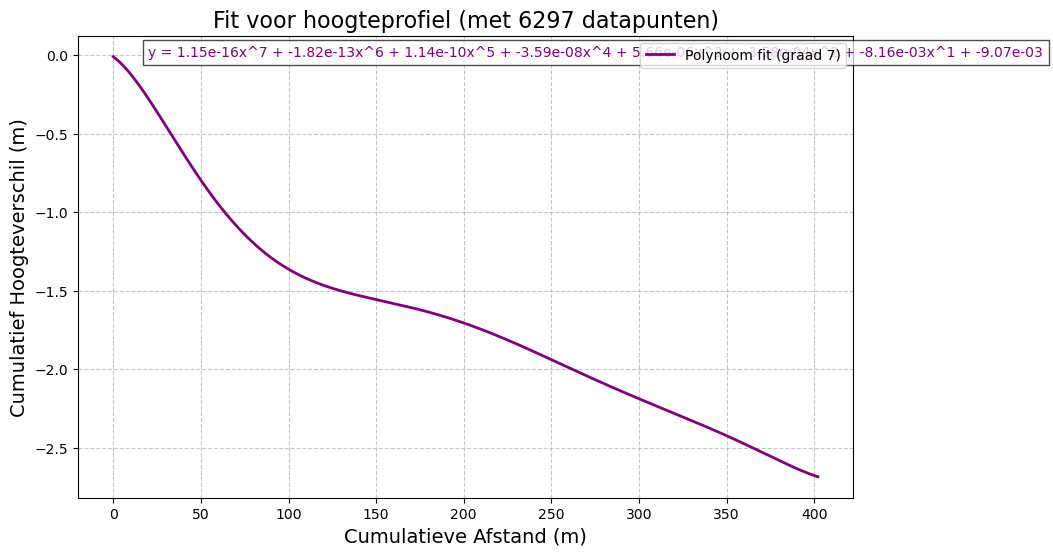

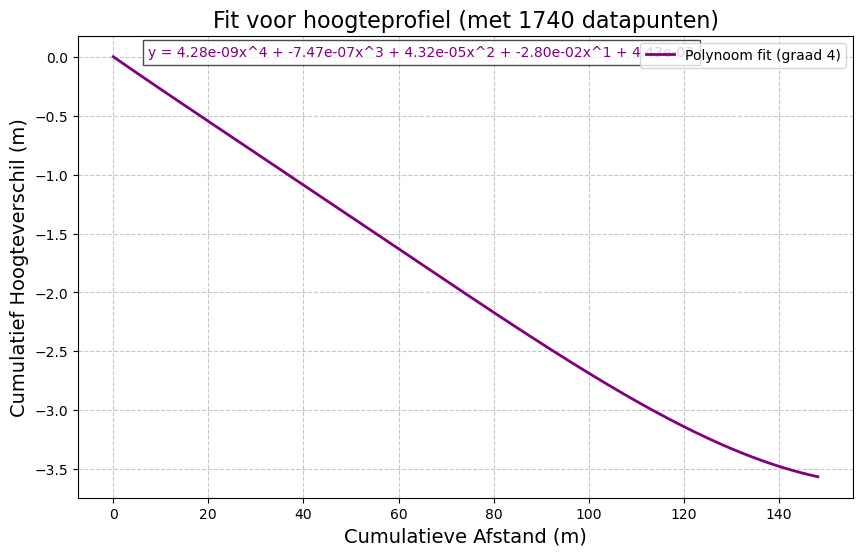

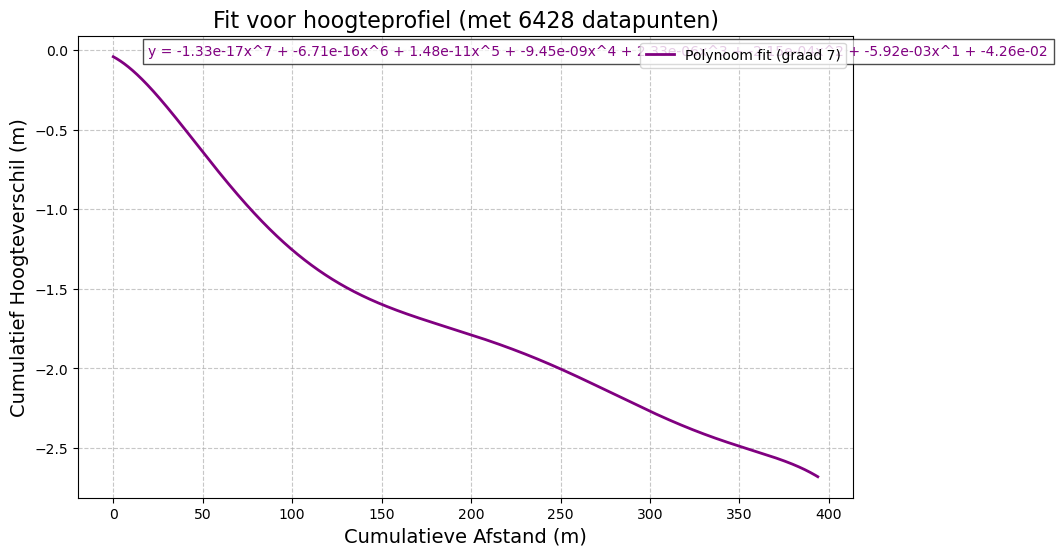

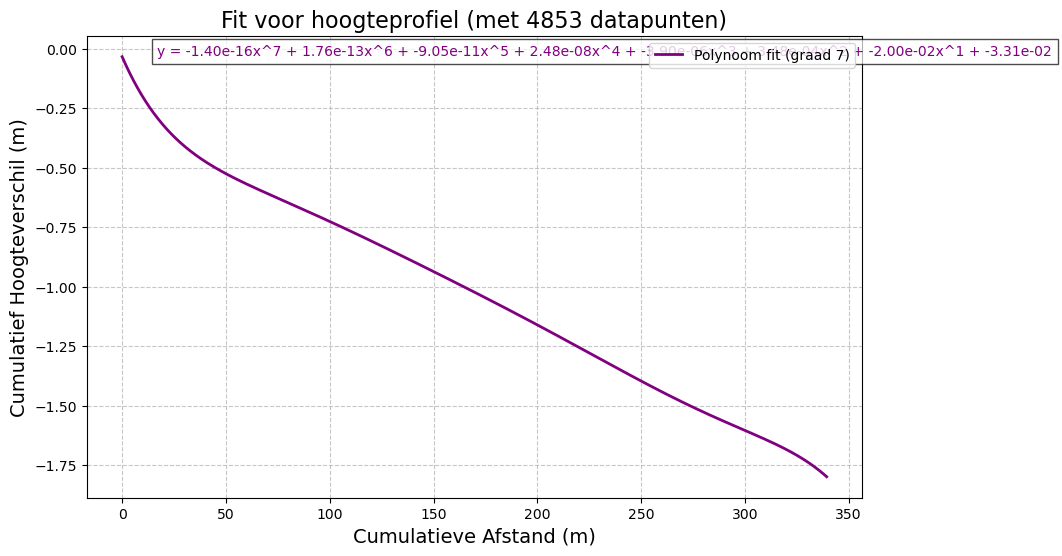

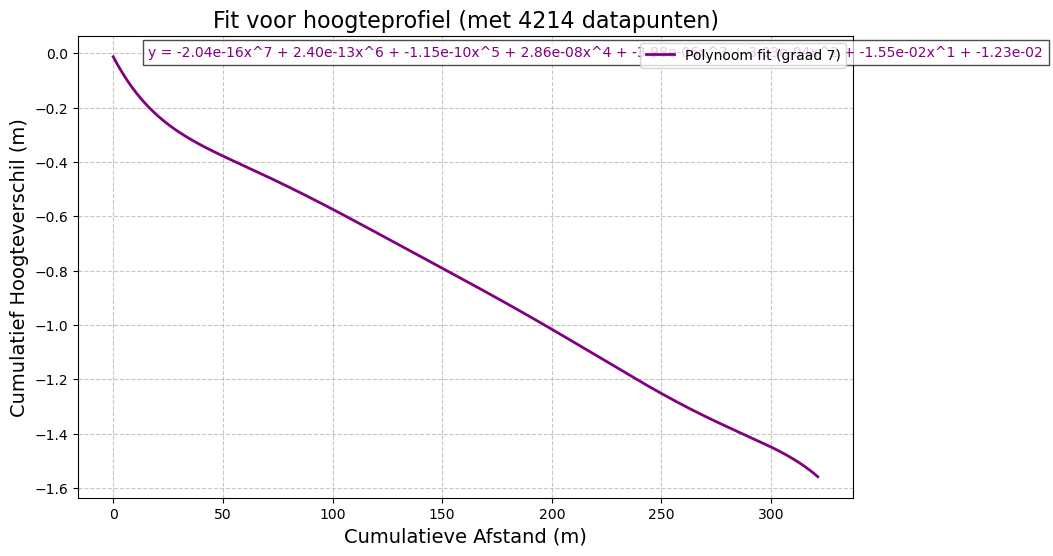

hoogteverschil (m)  delta h (m)
0              -0.012327     0.000000
1              -0.013504    -0.001177
2              -0.014677    -0.001173
3              -0.015847    -0.001170
4              -0.017013    -0.001166
...                  ...          ...
4209           -1.556366    -0.000530
4210           -1.556897    -0.000531
4211           -1.557430    -0.000533
4212           -1.557964    -0.000534
4213           -1.558500    -0.000536

[4214 rows x 2 columns]

In [88]:
"""
    Voert een polynoomfit uit op het hoogteprofiel, plot de fit en berekent het hoogteverschil.

    Parameters:
    dataframe (pd.DataFrame): DataFrame met de kolommen 'cumulatieve_afstand' en 'cumulatief_hoogteverschil'.
    polynoom_graad (int): De graad van de polynoom die aan de data wordt aangepast.
    x_fit_start (float): De startwaarde voor de x-as bij het genereren van de fit.
    x_fit_end (float): De eindwaarde voor de x-as bij het genereren van de fit.
    num_points (int): Het aantal punten voor de x-as bij het genereren van de fit.

    Returns:
    pd.DataFrame: DataFrame met de berekende hoogteverschillen en hun verschillen.
    """
# Aanroepen van de functie
df_h = lib.analyseer_hoogteprofiel(hoogte_met_afstand_df, polynoom_graad=7, x_fit_start=0, x_fit_end=402, num_points=6297)

df_h2 = lib.analyseer_hoogteprofiel(hoogte_met_afstand_df2, polynoom_graad=4, x_fit_start=0, x_fit_end=148.18, num_points=1740)

df_h3 = lib.analyseer_hoogteprofiel(hoogte_met_afstand_df3, polynoom_graad=7, x_fit_start=0, x_fit_end=393.82, num_points=6428)

df_h4 = lib.analyseer_hoogteprofiel(hoogte_met_afstand_df4, polynoom_graad=7, x_fit_start=0, x_fit_end=339.39, num_points=4853)

df_h5 = lib.analyseer_hoogteprofiel(hoogte_met_afstand_df5, polynoom_graad=7, x_fit_start=0, x_fit_end=321.29, num_points=4214)

# Bekijken van de eerste paar rijen van het resultaat
df_h5




In [92]:


# Controleer of beide DataFrames dezelfde lengte hebben
# Dit is essentieel om ervoor te zorgen dat de rijen correct op elkaar worden afgestemd bij het samenvoegen.
if len(df_meetstuk) != len(df_h):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk
# Dit wordt gedaan door de intersectie te nemen van de kolommen van beide DataFrames.
bestaande_kolommen = df_meetstuk.columns.intersection(df_h.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_h
# Hierdoor blijven alleen de kolommen over die nog niet in df_meetstuk aanwezig zijn.
df_h_uniek = df_h.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
# Beide DataFrames worden eerst gereset naar een standaard numerieke index om ervoor te zorgen dat de rijen correct worden uitgelijnd.
# Vervolgens worden ze kolomgewijs samengevoegd met behulp van pd.concat.
df_meetstuk = pd.concat([df_meetstuk.reset_index(drop=True), df_h_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
# Dit geeft een overzicht van df_meetstuk met de toegevoegde kolommen uit df_h.
df_meetstuk


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5973.8667                  03|04   
1                   5             5973.8755                  03|04   
2                   5             5973.8842                  03|04   
3                   5             5973.8930                  03|04   
4                   5             5973.9018                  03|04   
...               ...                   ...                    ...   
6292                5             6029.1495                  03|04   
6293                5             6029.1583                  03|04   
6294                5             6029.1671                  03|04   
6295                5             6029.1759                  03|04   
6296                5             6029.1847                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       2332.2251                       0.722   
1                                       2332.2339                       0.705   
2                                       2332.2427                       0.688   
3                                       2332.2515                       0.668   
4                                       2332.2603                       0.650   
...                                           ...                         ...   
6292                                    2387.4983                       0.021   
6293                                    2387.5071                       0.020   
6294                                    2387.5161                       0.019   
6295                                    2387.5249                       0.019   
6296                                    2387.5337                       0.018   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.054                                -0.0   
1                       -0.055                                -0.0   
2                       -0.053                                -0.0   
3                       -0.055                                -0.0   
4                       -0.055                                -0.0   
...                        ...                                 ...   
6292                    -0.079                                -0.0   
6293                    -0.078                                -0.0   
6294                    -0.078                                -0.0   
6295                    -0.078                                -0.0   
6296                    -0.078                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            129044   
1                                            129044   
2                                            129044   
3                                            129044   
4                                            129044   
...                                             ...   
6292                                         129044   
6293                                         129044   
6294                                         129044   
6295                                         129044   
6296                                         129044   

      Spanning aan de ingang van motordriver (V)  \
0                                         27.371   
1                                         27.371   
2                                         27.371   
3                                         27.372   
4                                         27.372   
...                                          ...   
6292                                      30.269   
6293                                      30.269   
6294                                      30.269   
6295                                      30.269   
6296                                      30.269   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [93]:

# Bereken de energieën
df_energie = lib.bereken_energie(df_meetstuk)

# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk) != len(df_energie):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk
bestaande_kolommen = df_meetstuk.columns.intersection(df_energie.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_energie
df_energie_uniek = df_energie.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk = pd.concat([df_meetstuk.reset_index(drop=True), df_energie_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk



Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5973.8667                  03|04   
1                   5             5973.8755                  03|04   
2                   5             5973.8842                  03|04   
3                   5             5973.8930                  03|04   
4                   5             5973.9018                  03|04   
...               ...                   ...                    ...   
6292                5             6029.1495                  03|04   
6293                5             6029.1583                  03|04   
6294                5             6029.1671                  03|04   
6295                5             6029.1759                  03|04   
6296                5             6029.1847                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       2332.2251                       0.722   
1                                       2332.2339                       0.705   
2                                       2332.2427                       0.688   
3                                       2332.2515                       0.668   
4                                       2332.2603                       0.650   
...                                           ...                         ...   
6292                                    2387.4983                       0.021   
6293                                    2387.5071                       0.020   
6294                                    2387.5161                       0.019   
6295                                    2387.5249                       0.019   
6296                                    2387.5337                       0.018   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.054                                -0.0   
1                       -0.055                                -0.0   
2                       -0.053                                -0.0   
3                       -0.055                                -0.0   
4                       -0.055                                -0.0   
...                        ...                                 ...   
6292                    -0.079                                -0.0   
6293                    -0.078                                -0.0   
6294                    -0.078                                -0.0   
6295                    -0.078                                -0.0   
6296                    -0.078                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            129044   
1                                            129044   
2                                            129044   
3                                            129044   
4                                            129044   
...                                             ...   
6292                                         129044   
6293                                         129044   
6294                                         129044   
6295                                         129044   
6296                                         129044   

      Spanning aan de ingang van motordriver (V)  \
0                                         27.371   
1                                         27.371   
2                                         27.371   
3                                         27.372   
4                                         27.372   
...                                          ...   
6292                                      30.269   
6293                                      30.269   
6294                                      30.269   
6295                                      30.269   
6296                                      30.269   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [94]:
# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk2) != len(df_h2):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk2
bestaande_kolommen = df_meetstuk2.columns.intersection(df_h2.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_h2
df_h2_uniek = df_h2.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk2 = pd.concat([df_meetstuk2.reset_index(drop=True), df_h2_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk2

Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5910.7529                  03|04   
1                   5             5910.7617                  03|04   
2                   5             5910.7704                  03|04   
3                   5             5910.7791                  03|04   
4                   5             5910.7879                  03|04   
...               ...                   ...                    ...   
1735                5             5925.9960                  03|04   
1736                5             5926.0048                  03|04   
1737                5             5926.0135                  03|04   
1738                5             5926.0223                  03|04   
1739                5             5926.0311                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       2269.1223                       0.022   
1                                       2269.1311                       0.023   
2                                       2269.1399                       0.023   
3                                       2269.1484                       0.023   
4                                       2269.1572                       0.023   
...                                           ...                         ...   
1735                                    2284.3625                       0.023   
1736                                    2284.3713                       0.022   
1737                                    2284.3801                       0.023   
1738                                    2284.3889                       0.023   
1739                                    2284.3977                       0.023   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.045                                -0.0   
1                       -0.045                                -0.0   
2                       -0.047                                -0.0   
3                       -0.048                                -0.0   
4                       -0.049                                -0.0   
...                        ...                                 ...   
1735                    -0.059                                -0.0   
1736                    -0.060                                -0.0   
1737                    -0.061                                -0.0   
1738                    -0.062                                -0.0   
1739                    -0.062                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            124365   
1                                            124365   
2                                            124365   
3                                            124365   
4                                            124365   
...                                             ...   
1735                                         124365   
1736                                         124365   
1737                                         124365   
1738                                         124365   
1739                                         124365   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.758   
1                                         26.760   
2                                         26.762   
3                                         26.764   
4                                         26.765   
...                                          ...   
1735                                      28.331   
1736                                      28.332   
1737                                      28.333   
1738                                      28.333   
1739                                      28.334   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [95]:
# Bereken de energieën
df_energie2 = lib.bereken_energie(df_meetstuk2)

# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk2) != len(df_energie2):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk2
bestaande_kolommen = df_meetstuk2.columns.intersection(df_energie2.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_energie2
df_energie2_uniek = df_energie2.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk2 = pd.concat([df_meetstuk2.reset_index(drop=True), df_energie2_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk2


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5910.7529                  03|04   
1                   5             5910.7617                  03|04   
2                   5             5910.7704                  03|04   
3                   5             5910.7791                  03|04   
4                   5             5910.7879                  03|04   
...               ...                   ...                    ...   
1735                5             5925.9960                  03|04   
1736                5             5926.0048                  03|04   
1737                5             5926.0135                  03|04   
1738                5             5926.0223                  03|04   
1739                5             5926.0311                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       2269.1223                       0.022   
1                                       2269.1311                       0.023   
2                                       2269.1399                       0.023   
3                                       2269.1484                       0.023   
4                                       2269.1572                       0.023   
...                                           ...                         ...   
1735                                    2284.3625                       0.023   
1736                                    2284.3713                       0.022   
1737                                    2284.3801                       0.023   
1738                                    2284.3889                       0.023   
1739                                    2284.3977                       0.023   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.045                                -0.0   
1                       -0.045                                -0.0   
2                       -0.047                                -0.0   
3                       -0.048                                -0.0   
4                       -0.049                                -0.0   
...                        ...                                 ...   
1735                    -0.059                                -0.0   
1736                    -0.060                                -0.0   
1737                    -0.061                                -0.0   
1738                    -0.062                                -0.0   
1739                    -0.062                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            124365   
1                                            124365   
2                                            124365   
3                                            124365   
4                                            124365   
...                                             ...   
1735                                         124365   
1736                                         124365   
1737                                         124365   
1738                                         124365   
1739                                         124365   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.758   
1                                         26.760   
2                                         26.762   
3                                         26.764   
4                                         26.765   
...                                          ...   
1735                                      28.331   
1736                                      28.332   
1737                                      28.333   
1738                                      28.333   
1739                                      28.334   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [96]:
# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk3) != len(df_h3):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk3
bestaande_kolommen = df_meetstuk3.columns.intersection(df_h3.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_h3
df_h3_uniek = df_h3.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk3 = pd.concat([df_meetstuk3.reset_index(drop=True), df_h3_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk3


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5104.2137                  03|04   
1                   5             5104.2223                  03|04   
2                   5             5104.2308                  03|04   
3                   5             5104.2394                  03|04   
4                   5             5104.2480                  03|04   
...               ...                   ...                    ...   
6423                5             5159.7457                  03|04   
6424                5             5159.7543                  03|04   
6425                5             5159.7630                  03|04   
6426                5             5159.7716                  03|04   
6427                5             5159.7803                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       1462.7227                       0.339   
1                                       1462.7312                       0.323   
2                                       1462.7397                       0.306   
3                                       1462.7484                       0.290   
4                                       1462.7572                       0.273   
...                                           ...                         ...   
6423                                    1518.2450                       0.020   
6424                                    1518.2535                       0.020   
6425                                    1518.2622                       0.019   
6426                                    1518.2710                       0.019   
6427                                    1518.2795                       0.016   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.053                                -0.0   
1                       -0.053                                -0.0   
2                       -0.051                                -0.0   
3                       -0.051                                -0.0   
4                       -0.053                                -0.0   
...                        ...                                 ...   
6423                    -0.066                                -0.0   
6424                    -0.067                                -0.0   
6425                    -0.066                                -0.0   
6426                    -0.066                                -0.0   
6427                    -0.067                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                             58328   
1                                             58328   
2                                             58328   
3                                             58328   
4                                             58328   
...                                             ...   
6423                                          58328   
6424                                          58328   
6425                                          58328   
6426                                          58328   
6427                                          58328   

      Spanning aan de ingang van motordriver (V)  \
0                                         28.123   
1                                         28.124   
2                                         28.125   
3                                         28.127   
4                                         28.127   
...                                          ...   
6423                                      30.596   
6424                                      30.596   
6425                                      30.596   
6426                                      30.596   
6427                                      30.597   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [97]:
# Bereken de energieën
df_energie3 = lib.bereken_energie(df_meetstuk3)

# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk3) != len(df_energie3):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk3
bestaande_kolommen = df_meetstuk3.columns.intersection(df_energie3.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_energie3
df_energie3_uniek = df_energie3.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk3 = pd.concat([df_meetstuk3.reset_index(drop=True), df_energie3_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk3


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5104.2137                  03|04   
1                   5             5104.2223                  03|04   
2                   5             5104.2308                  03|04   
3                   5             5104.2394                  03|04   
4                   5             5104.2480                  03|04   
...               ...                   ...                    ...   
6423                5             5159.7457                  03|04   
6424                5             5159.7543                  03|04   
6425                5             5159.7630                  03|04   
6426                5             5159.7716                  03|04   
6427                5             5159.7803                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       1462.7227                       0.339   
1                                       1462.7312                       0.323   
2                                       1462.7397                       0.306   
3                                       1462.7484                       0.290   
4                                       1462.7572                       0.273   
...                                           ...                         ...   
6423                                    1518.2450                       0.020   
6424                                    1518.2535                       0.020   
6425                                    1518.2622                       0.019   
6426                                    1518.2710                       0.019   
6427                                    1518.2795                       0.016   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.053                                -0.0   
1                       -0.053                                -0.0   
2                       -0.051                                -0.0   
3                       -0.051                                -0.0   
4                       -0.053                                -0.0   
...                        ...                                 ...   
6423                    -0.066                                -0.0   
6424                    -0.067                                -0.0   
6425                    -0.066                                -0.0   
6426                    -0.066                                -0.0   
6427                    -0.067                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                             58328   
1                                             58328   
2                                             58328   
3                                             58328   
4                                             58328   
...                                             ...   
6423                                          58328   
6424                                          58328   
6425                                          58328   
6426                                          58328   
6427                                          58328   

      Spanning aan de ingang van motordriver (V)  \
0                                         28.123   
1                                         28.124   
2                                         28.125   
3                                         28.127   
4                                         28.127   
...                                          ...   
6423                                      30.596   
6424                                      30.596   
6425                                      30.596   
6426                                      30.596   
6427                                      30.597   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [98]:
# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk4) != len(df_h4):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk3
bestaande_kolommen = df_meetstuk4.columns.intersection(df_h4.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_h3
df_h4_uniek = df_h4.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk4 = pd.concat([df_meetstuk4.reset_index(drop=True), df_h4_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk4


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             6664.4076                  03|04   
1                   5             6664.4164                  03|04   
2                   5             6664.4252                  03|04   
3                   5             6664.4340                  03|04   
4                   5             6664.4427                  03|04   
...               ...                   ...                    ...   
4848                5             6707.0033                  03|04   
4849                5             6707.0121                  03|04   
4850                5             6707.0209                  03|04   
4851                5             6707.0297                  03|04   
4852                5             6707.0385                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       3022.6462                       0.552   
1                                       3022.6550                       0.541   
2                                       3022.6638                       0.529   
3                                       3022.6726                       0.519   
4                                       3022.6816                       0.509   
...                                           ...                         ...   
4848                                    3065.2346                       0.021   
4849                                    3065.2434                       0.022   
4850                                    3065.2522                       0.021   
4851                                    3065.2610                       0.022   
4852                                    3065.2698                       0.022   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.056                                -0.0   
1                       -0.054                                -0.0   
2                       -0.054                                -0.0   
3                       -0.054                                -0.0   
4                       -0.055                                -0.0   
...                        ...                                 ...   
4848                    -0.081                                -0.0   
4849                    -0.082                                -0.0   
4850                    -0.080                                -0.0   
4851                    -0.078                                -0.0   
4852                    -0.078                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            180475   
1                                            180475   
2                                            180475   
3                                            180475   
4                                            180475   
...                                             ...   
4848                                         180475   
4849                                         180475   
4850                                         180475   
4851                                         180475   
4852                                         180475   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.798   
1                                         26.799   
2                                         26.801   
3                                         26.802   
4                                         26.803   
...                                          ...   
4848                                      29.522   
4849                                      29.523   
4850                                      29.523   
4851                                      29.523   
4852                                      29.524   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [99]:
# Bereken de energieën
df_energie4 = lib.bereken_energie(df_meetstuk4)

# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk4) != len(df_energie4):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk3
bestaande_kolommen = df_meetstuk4.columns.intersection(df_energie4.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_energie3
df_energie4_uniek = df_energie4.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk4 = pd.concat([df_meetstuk4.reset_index(drop=True), df_energie4_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk4


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             6664.4076                  03|04   
1                   5             6664.4164                  03|04   
2                   5             6664.4252                  03|04   
3                   5             6664.4340                  03|04   
4                   5             6664.4427                  03|04   
...               ...                   ...                    ...   
4848                5             6707.0033                  03|04   
4849                5             6707.0121                  03|04   
4850                5             6707.0209                  03|04   
4851                5             6707.0297                  03|04   
4852                5             6707.0385                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       3022.6462                       0.552   
1                                       3022.6550                       0.541   
2                                       3022.6638                       0.529   
3                                       3022.6726                       0.519   
4                                       3022.6816                       0.509   
...                                           ...                         ...   
4848                                    3065.2346                       0.021   
4849                                    3065.2434                       0.022   
4850                                    3065.2522                       0.021   
4851                                    3065.2610                       0.022   
4852                                    3065.2698                       0.022   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.056                                -0.0   
1                       -0.054                                -0.0   
2                       -0.054                                -0.0   
3                       -0.054                                -0.0   
4                       -0.055                                -0.0   
...                        ...                                 ...   
4848                    -0.081                                -0.0   
4849                    -0.082                                -0.0   
4850                    -0.080                                -0.0   
4851                    -0.078                                -0.0   
4852                    -0.078                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            180475   
1                                            180475   
2                                            180475   
3                                            180475   
4                                            180475   
...                                             ...   
4848                                         180475   
4849                                         180475   
4850                                         180475   
4851                                         180475   
4852                                         180475   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.798   
1                                         26.799   
2                                         26.801   
3                                         26.802   
4                                         26.803   
...                                          ...   
4848                                      29.522   
4849                                      29.523   
4850                                      29.523   
4851                                      29.523   
4852                                      29.524   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [100]:
# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk5) != len(df_h5):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk3
bestaande_kolommen = df_meetstuk5.columns.intersection(df_h5.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_h3
df_h5_uniek = df_h5.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk5 = pd.concat([df_meetstuk5.reset_index(drop=True), df_h5_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk5


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5560.0149                  03|04   
1                   5             5560.0236                  03|04   
2                   5             5560.0322                  03|04   
3                   5             5560.0409                  03|04   
4                   5             5560.0496                  03|04   
...               ...                   ...                    ...   
4209                5             5596.6097                  03|04   
4210                5             5596.6184                  03|04   
4211                5             5596.6271                  03|04   
4212                5             5596.6358                  03|04   
4213                5             5596.6445                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       1918.4449                       0.896   
1                                       1918.4536                       0.887   
2                                       1918.4622                       0.876   
3                                       1918.4709                       0.867   
4                                       1918.4799                       0.858   
...                                           ...                         ...   
4209                                    1955.0334                       0.021   
4210                                    1955.0422                       0.021   
4211                                    1955.0508                       0.021   
4212                                    1955.0596                       0.021   
4213                                    1955.0684                       0.020   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.044                                -0.0   
1                       -0.044                                -0.0   
2                       -0.044                                -0.0   
3                       -0.045                                -0.0   
4                       -0.043                                -0.0   
...                        ...                                 ...   
4209                    -0.069                                -0.0   
4210                    -0.069                                -0.0   
4211                    -0.068                                -0.0   
4212                    -0.067                                -0.0   
4213                    -0.068                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                             94289   
1                                             94289   
2                                             94289   
3                                             94289   
4                                             94289   
...                                             ...   
4209                                          94289   
4210                                          94289   
4211                                          94289   
4212                                          94289   
4213                                          94289   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.811   
1                                         26.813   
2                                         26.815   
3                                         26.816   
4                                         26.817   
...                                          ...   
4209                                      29.527   
4210                                      29.528   
4211                                      29.528   
4212                                      29.528   
4213                                      29.529   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [101]:
# Bereken de energieën
df_energie5 = lib.bereken_energie(df_meetstuk5)

# Controleer of beide DataFrames dezelfde lengte hebben
if len(df_meetstuk5) != len(df_energie5):
    raise ValueError("De DataFrames hebben niet dezelfde lengte en kunnen niet direct worden samengevoegd.")

# Stap 1: Identificeer de kolommen die al bestaan in df_meetstuk3
bestaande_kolommen = df_meetstuk5.columns.intersection(df_energie5.columns)

# Stap 2: Verwijder de bestaande kolommen uit df_energie3
df_energie5_uniek = df_energie5.drop(columns=bestaande_kolommen)

# Stap 3: Voeg de DataFrames samen
df_meetstuk5 = pd.concat([df_meetstuk5.reset_index(drop=True), df_energie5_uniek.reset_index(drop=True)], axis=1)

# Toon het bijgewerkte DataFrame
df_meetstuk5


Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             5560.0149                  03|04   
1                   5             5560.0236                  03|04   
2                   5             5560.0322                  03|04   
3                   5             5560.0409                  03|04   
4                   5             5560.0496                  03|04   
...               ...                   ...                    ...   
4209                5             5596.6097                  03|04   
4210                5             5596.6184                  03|04   
4211                5             5596.6271                  03|04   
4212                5             5596.6358                  03|04   
4213                5             5596.6445                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       1918.4449                       0.896   
1                                       1918.4536                       0.887   
2                                       1918.4622                       0.876   
3                                       1918.4709                       0.867   
4                                       1918.4799                       0.858   
...                                           ...                         ...   
4209                                    1955.0334                       0.021   
4210                                    1955.0422                       0.021   
4211                                    1955.0508                       0.021   
4212                                    1955.0596                       0.021   
4213                                    1955.0684                       0.020   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.044                                -0.0   
1                       -0.044                                -0.0   
2                       -0.044                                -0.0   
3                       -0.045                                -0.0   
4                       -0.043                                -0.0   
...                        ...                                 ...   
4209                    -0.069                                -0.0   
4210                    -0.069                                -0.0   
4211                    -0.068                                -0.0   
4212                    -0.067                                -0.0   
4213                    -0.068                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                             94289   
1                                             94289   
2                                             94289   
3                                             94289   
4                                             94289   
...                                             ...   
4209                                          94289   
4210                                          94289   
4211                                          94289   
4212                                          94289   
4213                                          94289   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.811   
1                                         26.813   
2                                         26.815   
3                                         26.816   
4                                         26.817   
...                                          ...   
4209                                      29.527   
4210                                      29.528   
4211                                      29.528   
4212                                      29.528   
4213                                      29.529   

      Stroom door de ingang van motordriver (A)  ...  \
0        

In [102]:

# Functie om de hoek (bearing) te berekenen
def calculate_bearing(lat1, lon1, lat2, lon2):
    # Converteer graden naar radialen
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    
    # Verschil in lengtegraden
    delta_lon = lon2_rad - lon1_rad
    
    # Berekening met de formule
    x = np.sin(delta_lon) * np.cos(lat2_rad)
    y = np.cos(lat1_rad) * np.sin(lat2_rad) - np.sin(lat1_rad) * np.cos(lat2_rad) * np.cos(delta_lon)
    bearing_rad = np.arctan2(x, y)
    
    # Converteer naar graden en normaliseer tot 0-360°
    bearing_deg = np.degrees(bearing_rad)
    bearing_deg = (bearing_deg + 360) % 360  # Zorg dat het tussen 0 en 360 ligt
    
    return bearing_deg

# Voeg kolommen toe met expliciete toewijzing
df_meetstuk4 = df_meetstuk4.copy()  # Maak expliciet een kopie om te werken
df_meetstuk4['lat_next'] = df_meetstuk4['GPS latitude, in graden'].shift(-1)
df_meetstuk4['lon_next'] = df_meetstuk4['GPS longitude, in graden'].shift(-1)

# Bereken de hoek (bearing) tussen elk paar opeenvolgende punten
df_meetstuk4['Bearing (degrees)'] = df_meetstuk4.apply(
    lambda row: calculate_bearing(row['GPS latitude, in graden'], row['GPS longitude, in graden'],
                                  row['lat_next'], row['lon_next']), axis=1
)

# Verwijder de laatste rij omdat er geen volgende punt is
df_meetstuk4 = df_meetstuk4.iloc[:-1].copy()  # Zorg voor een nieuwe kopie na slicing

# Optioneel: Verwijder tijdelijke kolommen met expliciete toewijzing
df_meetstuk4.drop(['lat_next', 'lon_next'], axis=1, inplace=True)


x = np.arange(len(df_meetstuk4))  # Sequential indices for x

# Create a color column based on the bearing values
def assign_color(bearing):
    if bearing == 0:
        return 'blue' 
    elif 100 < bearing <= 120:
        return 'red'
    elif 120 < bearing <= 140:
        return 'green'
    elif bearing > 140:
        return 'yellow'
    else:
        return 'black'  # Default color for other cases
    
def assign_label(bearing):
    if bearing == 0:
        return 'Hoek is 0 graden' 
    elif 100 < bearing <= 120:
        return 'Hoek is tussen 250 en 300 graden'
    elif 120 < bearing <= 140:
        return 'Hoek is tussen 300 en 320 graden'
    elif bearing > 140:
        return 'Hoek is groter dan 320 graden'
    else:
        return 'Andere hoek'

# Apply the color and label assignment functions
df_meetstuk4['Color'] = df_meetstuk4['Bearing (degrees)'].apply(assign_color)
df_meetstuk4['Label'] = df_meetstuk4['Bearing (degrees)'].apply(assign_label)

# Define unique colors and labels for the legend
unique_labels = df_meetstuk4[['Color', 'Label']].drop_duplicates()

df_meetstuk4

Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
0                   5             6664.4076                  03|04   
1                   5             6664.4164                  03|04   
2                   5             6664.4252                  03|04   
3                   5             6664.4340                  03|04   
4                   5             6664.4427                  03|04   
...               ...                   ...                    ...   
4847                5             6706.9945                  03|04   
4848                5             6707.0033                  03|04   
4849                5             6707.0121                  03|04   
4850                5             6707.0209                  03|04   
4851                5             6707.0297                  03|04   

      Tijd sinds laatste herstart motordriver (s)  Spanning over de motor (V)  \
0                                       3022.6462                       0.552   
1                                       3022.6550                       0.541   
2                                       3022.6638                       0.529   
3                                       3022.6726                       0.519   
4                                       3022.6816                       0.509   
...                                           ...                         ...   
4847                                    3065.2258                       0.021   
4848                                    3065.2346                       0.021   
4849                                    3065.2434                       0.022   
4850                                    3065.2522                       0.021   
4851                                    3065.2610                       0.022   

      Stroom door de motor (A)  Vermogen geleverd aan de motor (W)  \
0                       -0.056                                -0.0   
1                       -0.054                                -0.0   
2                       -0.054                                -0.0   
3                       -0.054                                -0.0   
4                       -0.055                                -0.0   
...                        ...                                 ...   
4847                    -0.081                                -0.0   
4848                    -0.081                                -0.0   
4849                    -0.082                                -0.0   
4850                    -0.080                                -0.0   
4851                    -0.078                                -0.0   

      Energie geleverd aan de motor sinds reset (J)  \
0                                            180475   
1                                            180475   
2                                            180475   
3                                            180475   
4                                            180475   
...                                             ...   
4847                                         180475   
4848                                         180475   
4849                                         180475   
4850                                         180475   
4851                                         180475   

      Spanning aan de ingang van motordriver (V)  \
0                                         26.798   
1                                         26.799   
2                                         26.801   
3                                         26.802   
4                                         26.803   
...                                          ...   
4847                                      29.523   
4848                                      29.522   
4849                                      29.523   
4850                                      29.523   
4851                                      29.523   

      Stroom door de ingang van motordriver (A)  ...  \
0        

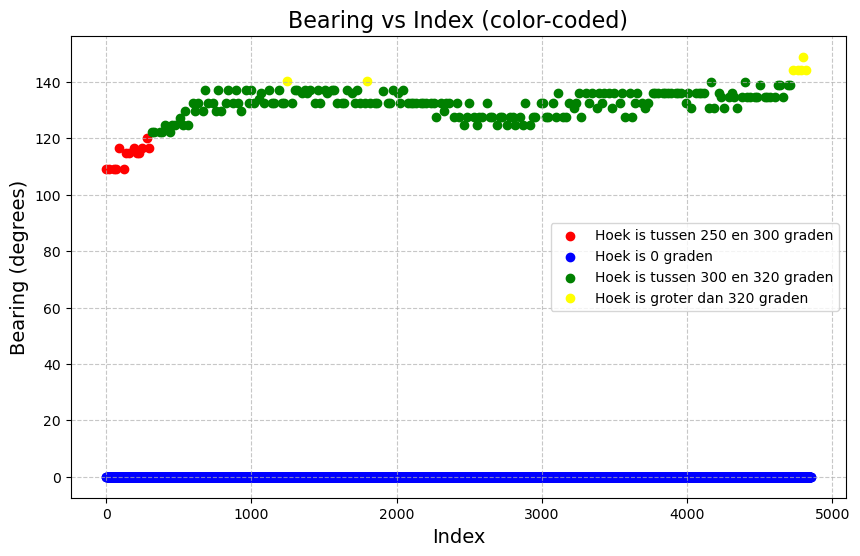

In [103]:


# Plot 2: Bearing vs Index
plt.figure(figsize=(10, 6))
for color, label in zip(unique_labels['Color'], unique_labels['Label']):
    subset = df_meetstuk4[df_meetstuk4['Color'] == color]
    plt.scatter(
        subset.index,  # Use the DataFrame index directly
        subset['Bearing (degrees)'], 
        color=color, 
        label=label
    )

plt.xlabel('Index', fontsize=14)
plt.ylabel('Bearing (degrees)', fontsize=14)
plt.title('Bearing vs Index (color-coded)', fontsize=16)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()



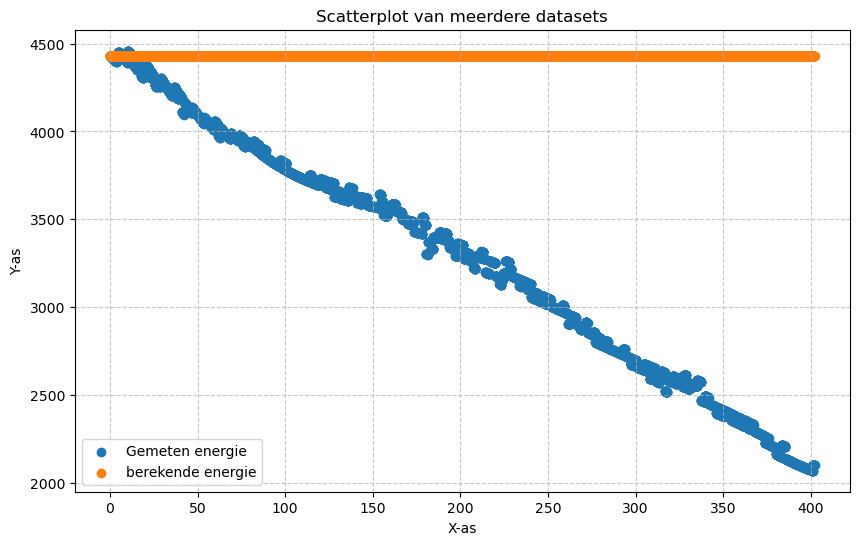

In [104]:
lib.plot_scatter((df_meetstuk,'afgelegde afstand (m)','Totale gemeten energie (GPS) (J)', 'Gemeten energie'),
                  (df_meetstuk, 'afgelegde afstand (m)', 'Totale theoretische energie (J)', 'berekende energie'))

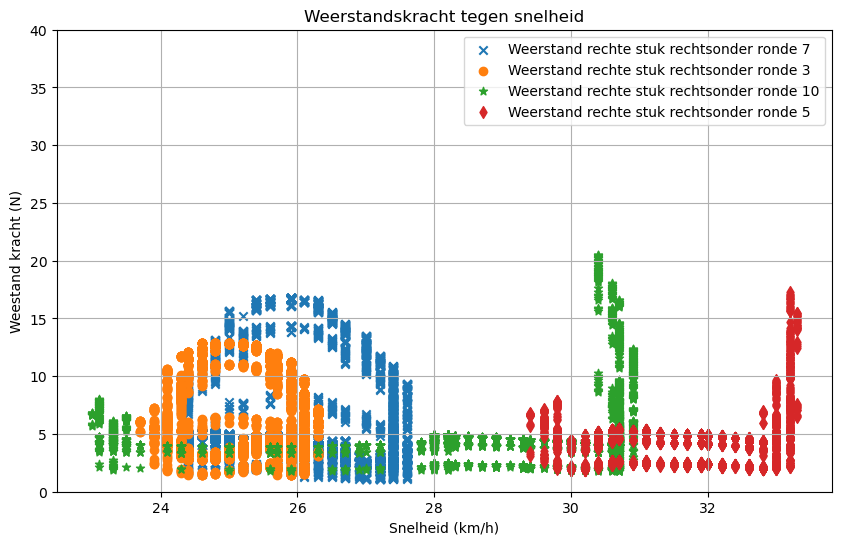

In [110]:



plt.figure(figsize=(10, 6))
plt.scatter(df_meetstuk['GPS speed, in km/h'],df_meetstuk['Weerstand met GPS Snelheid (N)'], label='Weerstand rechte stuk rechtsonder ronde 7', marker = 'x')
#plt.scatter(df_meetstuk2['GPS speed, in km/h'],df_meetstuk2['Weerstand met GPS Snelheid (N)'], label='Weerstand rechte stuk linksboven ronde 7', color = 'b')
plt.scatter(df_meetstuk3['GPS speed, in km/h'],df_meetstuk3['Weerstand met GPS Snelheid (N)'], label='Weerstand rechte stuk rechtsonder ronde 3', marker = 'o')
plt.scatter(df_meetstuk4['GPS speed, in km/h'],df_meetstuk4['Weerstand met GPS Snelheid (N)'], label='Weerstand rechte stuk rechtsonder ronde 10', marker = '*')
plt.scatter(df_meetstuk5['GPS speed, in km/h'],df_meetstuk5['Weerstand met GPS Snelheid (N)'], label='Weerstand rechte stuk rechtsonder ronde 5', marker = 'd')

#plt.scatter(df_e_kin["Gemeten Snelheid (m/s)"],df_e_kin['Weerstand (N)'], label='Met wielsnelheid', color = 'b')

plt.title('Weerstandskracht tegen snelheid')
plt.xlabel('Snelheid (km/h)')
plt.ylabel('Weestand kracht (N)')

# Stel de y-as limieten in
plt.ylim(0, 40)
# plt.xlim(23.3, 28)

plt.legend()
plt.grid()
plt.show()

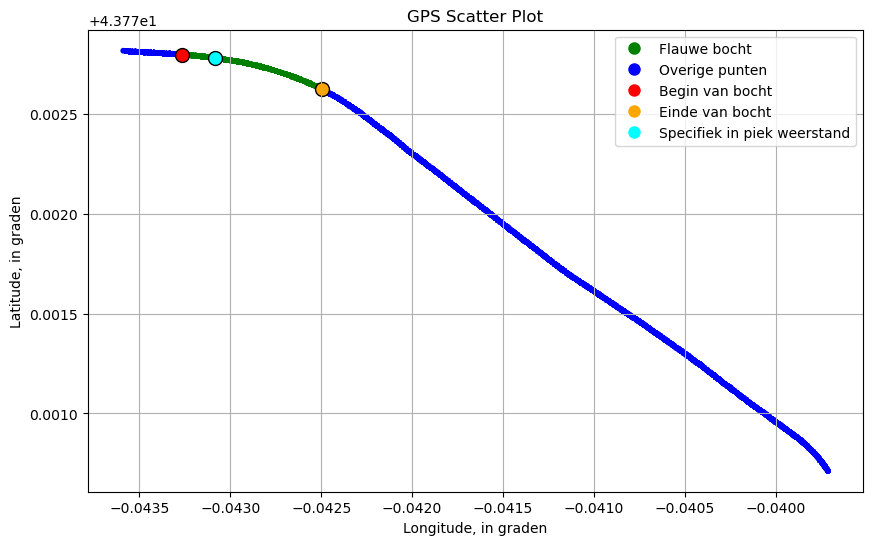

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, HTMLWriter
import pandas as pd

# Assuming 'df_e_kin' and 'filtered_motordriver' are your dataframes and correctly loaded with data

# Convert speeds to m/s
df_e_kin['Speed_m/s'] = df_e_kin['Gemeten_snelheden_GPS (m/s)']

# Remove rows where acceleration, speed, or resistance is NaN or infinite
df_e_kin = df_e_kin.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
df_e_kin = df_e_kin.dropna(subset=['Speed_m/s', 'Weerstand (N)'])  # Drop rows with NaN in these columns

# Filter data for resistance between 0 and 20 N
df_e_kin = df_e_kin[(df_e_kin['Weerstand (N)'] >= 0) & (df_e_kin['Weerstand (N)'] <= 20)]

# Prepare the figure for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Setup for GPS data plot
ax1.set_xlim(rechte_stuk_ronde7['GPS longitude, in graden'].min() - 0.0001, rechte_stuk_ronde7['GPS longitude, in graden'].max() + 0.0001)
ax1.set_ylim(rechte_stuk_ronde7['GPS latitude, in graden'].min() - 0.0001, rechte_stuk_ronde7['GPS latitude, in graden'].max() + 0.0001)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("GPS Tracking (Single Color)")

# Setup for resistance vs speed plot
ax2.set_xlim(df_e_kin['Speed_m/s'].min() - 1, df_e_kin['Speed_m/s'].max() + 1)
ax2.set_ylim(df_e_kin['Weerstand (N)'].min() - 5, df_e_kin['Weerstand (N)'].max() + 5)
ax2.set_xlabel("Speed (m/s)")
ax2.set_ylabel("Resistance (N)")
ax2.set_title("Resistance vs Speed (Single Color)")

# Initialize scatter plots
scat1 = ax1.scatter([], [], color='blue', alpha=0.7)
scat2 = ax2.scatter([], [], color='blue', alpha=0.7)

# Add a legend for acceleration categories
legend_labels = [
    ('red', 'Voor bocht'),
    ('blue', 'In bocht'),
    ('yellow', 'Na bocht')
]
for color, label in legend_labels:
    ax2.scatter([], [], color=color, label=label)  # Dummy points for legend
ax2.legend(title="Kleurenlegenda", loc='upper left')

# Define the update function for the animation
def update(frame):
    end = frame + 1  # Display one additional row per frame
    if end > len(df_e_kin):  # Stop when all data is shown
        return

    # Extract data chunk
    chunk = df_e_kin.iloc[:end]  # Include all data up to the current frame

    colors = chunk.index.map(
    lambda i: 'red' if i < 389106 else ('blue' if i <= 390200 else 'yellow'))
    
    # Update the GPS plot
    chunk_lat = rechte_stuk_ronde7.iloc[:end]['GPS latitude, in graden']
    chunk_lon = rechte_stuk_ronde7.iloc[:end]['GPS longitude, in graden']
    scat1.set_offsets(np.column_stack((chunk_lon, chunk_lat)))
    
    # Update the resistance vs speed plot
    scat2.set_offsets(np.column_stack((chunk['Speed_m/s'], chunk['Weerstand (N)'])))

# Animation settings
frames_count = max(len(rechte_stuk_ronde7), len(df_e_kin))
anim = FuncAnimation(fig, update, frames=frames_count, repeat=False, interval=100)  # Adjust the interval as needed

# Save as HTML file
output_path = "dynamic_tracking_single_color.html"
html_writer = HTMLWriter()
anim.save(output_path, writer=html_writer)

print(f"Animation saved as {output_path}.")


ValueError: Kolom Gemeten_snelheden_GPS (m/s) ontbreekt in df_meetstuk.

Animatie opgeslagen als dynamic_tracking_single_color_bocht.html.


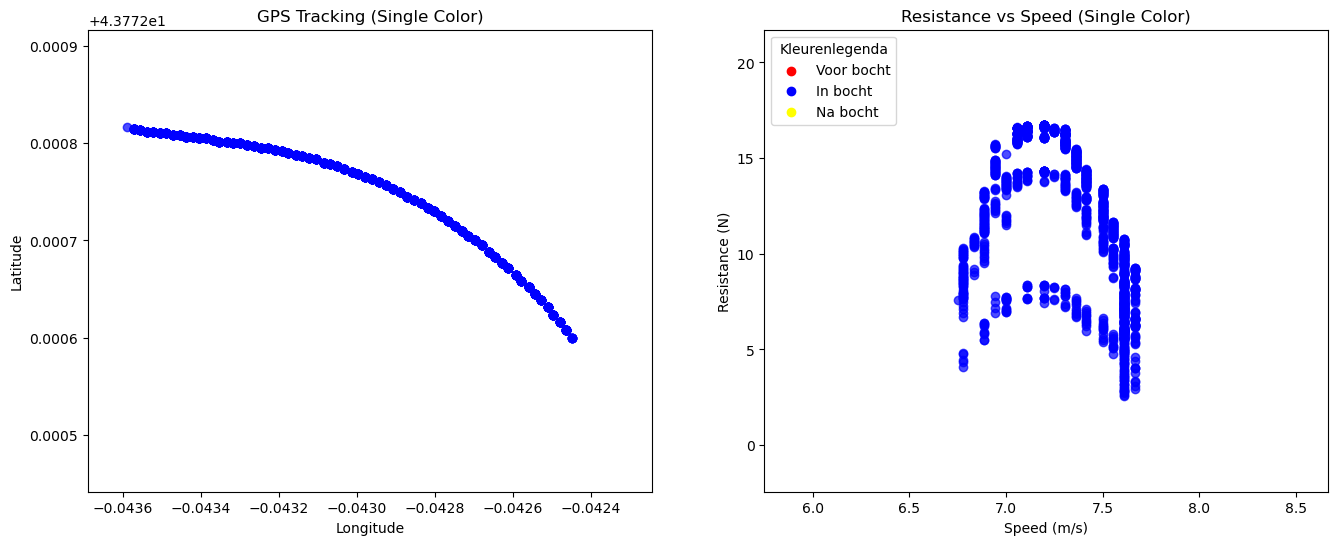

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, HTMLWriter
import pandas as pd

# Veronderstel dat 'df_e_kin' en 'rechte_stuk_ronde7' correct zijn geladen met de benodigde data

# Filter de dataframes op de gewenste indexrange
start_index = 388561
end_index = 390200

df_e_kin_filtered = df_e_kin.loc[start_index:end_index].copy()
rechte_stuk_ronde7_filtered = rechte_stuk_ronde7.loc[start_index:end_index].copy()

# Converteer snelheden naar m/s
df_e_kin_filtered['Speed_m/s'] = df_e_kin_filtered['Gemeten_snelheden_GPS (m/s)']

# Verwijder rijen waar snelheid of weerstand NaN of oneindig is
df_e_kin_filtered = df_e_kin_filtered.replace([np.inf, -np.inf], np.nan)
df_e_kin_filtered = df_e_kin_filtered.dropna(subset=['Speed_m/s', 'Weerstand (N)'])

# Filter data voor weerstand tussen 0 en 20 N
df_e_kin_filtered = df_e_kin_filtered[(df_e_kin_filtered['Weerstand (N)'] >= 0) & (df_e_kin_filtered['Weerstand (N)'] <= 20)]

# Bereid de figuur voor om te plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Instellingen voor GPS-gegevensplot
ax1.set_xlim(rechte_stuk_ronde7_filtered['GPS longitude, in graden'].min() - 0.0001,
             rechte_stuk_ronde7_filtered['GPS longitude, in graden'].max() + 0.0001)
ax1.set_ylim(rechte_stuk_ronde7_filtered['GPS latitude, in graden'].min() - 0.0001,
             rechte_stuk_ronde7_filtered['GPS latitude, in graden'].max() + 0.0001)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("GPS Tracking (Single Color)")

# Instellingen voor weerstand versus snelheid plot
ax2.set_xlim(df_e_kin_filtered['Speed_m/s'].min() - 1, df_e_kin_filtered['Speed_m/s'].max() + 1)
ax2.set_ylim(df_e_kin_filtered['Weerstand (N)'].min() - 5, df_e_kin_filtered['Weerstand (N)'].max() + 5)
ax2.set_xlabel("Speed (m/s)")
ax2.set_ylabel("Resistance (N)")
ax2.set_title("Resistance vs Speed (Single Color)")

# Initialiseer scatter plots met lege numpy-arrays
scat1 = ax1.scatter([], [], color='blue', alpha=0.7, animated=True)
scat2 = ax2.scatter([], [], color='blue', alpha=0.7, animated=True)

# Voeg een legenda toe voor acceleratiecategorieën
legend_labels = [
    ('red', 'Voor bocht'),
    ('blue', 'In bocht'),
    ('yellow', 'Na bocht')
]
for color, label in legend_labels:
    ax2.scatter([], [], color=color, label=label)  # Dummy punten voor legenda
ax2.legend(title="Kleurenlegenda", loc='upper left')

# Definieer de initialisatiefunctie voor de animatie
def init():
    scat1.set_offsets(np.empty((0, 2)))
    scat2.set_offsets(np.empty((0, 2)))
    return scat1, scat2

# Definieer de updatefunctie voor de animatie
def update(frame):
    end = frame + 1  # Toon één extra rij per frame
    if end > len(df_e_kin_filtered):  # Stop wanneer alle data is weergegeven
        return scat1, scat2

    # Haal data op tot het huidige frame
    chunk = df_e_kin_filtered.iloc[:end]

    # Update de GPS-plot
    chunk_lat = rechte_stuk_ronde7_filtered.iloc[:end]['GPS latitude, in graden']
    chunk_lon = rechte_stuk_ronde7_filtered.iloc[:end]['GPS longitude, in graden']
    scat1.set_offsets(np.column_stack((chunk_lon, chunk_lat)))

    # Update de weerstand versus snelheid plot
    scat2.set_offsets(np.column_stack((chunk['Speed_m/s'], chunk['Weerstand (N)'])))

    return scat1, scat2

# Animatie-instellingen
frames_count = len(df_e_kin_filtered)
anim = FuncAnimation(fig, update, frames=frames_count, init_func=init, repeat=False, interval=50, blit=True)

# Sla op als MP4-bestand
output_path = "dynamic_tracking_single_color_bocht.html"
html_writer = HTMLWriter()
anim.save(output_path, writer=html_writer, dpi=80)

print(f"Animatie opgeslagen als {output_path}.")


In [31]:
# Voeg de kolommen van df_e_kin_filtered toe aan rechte_stuk_ronde7_filtered
df_combined = pd.concat([rechte_stuk_ronde7, df_e_kin], axis=1)

# Bekijk het gecombineerde dataframe
df_combined

Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
388561                5             5973.7964                  03|04   
388562                5             5973.8052                  03|04   
388563                5             5973.8140                  03|04   
388564                5             5973.8228                  03|04   
388565                5             5973.8315                  03|04   
...                 ...                   ...                    ...   
394861                5             6029.1495                  03|04   
394862                5             6029.1583                  03|04   
394863                5             6029.1671                  03|04   
394864                5             6029.1759                  03|04   
394865                5             6029.1847                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
388561                                    2332.1548   
388562                                    2332.1636   
388563                                    2332.1724   
388564                                    2332.1812   
388565                                    2332.1899   
...                                             ...   
394861                                    2387.4983   
394862                                    2387.5071   
394863                                    2387.5161   
394864                                    2387.5249   
394865                                    2387.5337   

        Spanning over de motor (V)  Stroom door de motor (A)  \
388561                       0.848                    -0.051   
388562                       0.830                    -0.049   
388563                       0.812                    -0.051   
388564                       0.797                    -0.051   
388565                       0.783                    -0.050   
...                            ...                       ...   
394861                       0.021                    -0.079   
394862                       0.020                    -0.078   
394863                       0.019                    -0.078   
394864                       0.019                    -0.078   
394865                       0.018                    -0.078   

        Vermogen geleverd aan de motor (W)  \
388561                                -0.0   
388562                                -0.0   
388563                                -0.0   
388564                                -0.0   
388565                                -0.0   
...                                    ...   
394861                                -0.0   
394862                                -0.0   
394863                                -0.0   
394864                                -0.0   
394865                                -0.0   

        Energie geleverd aan de motor sinds reset (J)  \
388561                                         129044   
388562                                         129044   
388563                                         129044   
388564                                         129044   
388565                                         129044   
...                                               ...   
394861                                         129044   
394862                                         129044   
394863                                         129044   
394864                                         129044   
394865                                         129044   

        Spanning aan de ingang van motordriver (V)  \
388561                                      27.362   
388562                                      27.363   
388563                                      27.364   
388564                                      27.366   
388565                                      27.368   
...                                            ...   
394861                                      30.269   
394862                                     

In [69]:
df_combined

Datalogger port  Dataloggertijd, in s Format header (>03|04)  \
388561                5             5973.7964                  03|04   
388562                5             5973.8052                  03|04   
388563                5             5973.8140                  03|04   
388564                5             5973.8228                  03|04   
388565                5             5973.8315                  03|04   
...                 ...                   ...                    ...   
394861                5             6029.1495                  03|04   
394862                5             6029.1583                  03|04   
394863                5             6029.1671                  03|04   
394864                5             6029.1759                  03|04   
394865                5             6029.1847                  03|04   

        Tijd sinds laatste herstart motordriver (s)  \
388561                                    2332.1548   
388562                                    2332.1636   
388563                                    2332.1724   
388564                                    2332.1812   
388565                                    2332.1899   
...                                             ...   
394861                                    2387.4983   
394862                                    2387.5071   
394863                                    2387.5161   
394864                                    2387.5249   
394865                                    2387.5337   

        Spanning over de motor (V)  Stroom door de motor (A)  \
388561                       0.848                    -0.051   
388562                       0.830                    -0.049   
388563                       0.812                    -0.051   
388564                       0.797                    -0.051   
388565                       0.783                    -0.050   
...                            ...                       ...   
394861                       0.021                    -0.079   
394862                       0.020                    -0.078   
394863                       0.019                    -0.078   
394864                       0.019                    -0.078   
394865                       0.018                    -0.078   

        Vermogen geleverd aan de motor (W)  \
388561                                -0.0   
388562                                -0.0   
388563                                -0.0   
388564                                -0.0   
388565                                -0.0   
...                                    ...   
394861                                -0.0   
394862                                -0.0   
394863                                -0.0   
394864                                -0.0   
394865                                -0.0   

        Energie geleverd aan de motor sinds reset (J)  \
388561                                         129044   
388562                                         129044   
388563                                         129044   
388564                                         129044   
388565                                         129044   
...                                               ...   
394861                                         129044   
394862                                         129044   
394863                                         129044   
394864                                         129044   
394865                                         129044   

        Spanning aan de ingang van motordriver (V)  \
388561                                      27.362   
388562                                      27.363   
388563                                      27.364   
388564                                      27.366   
388565                                      27.368   
...                                            ...   
394861                                      30.269   
394862                                     

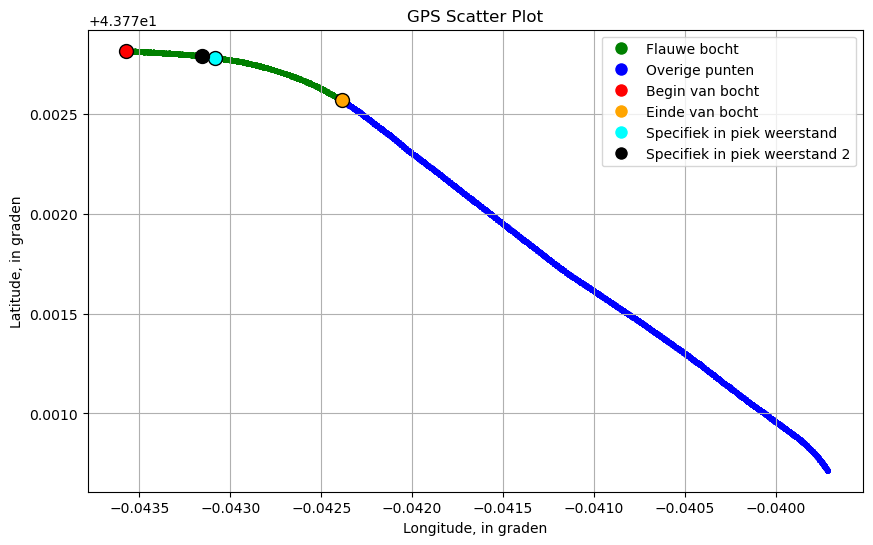

In [124]:
import matplotlib.pyplot as plt

# Stel de DataFrame opnieuw samen voor het rechte stuk
rechte_stuk_ronde7 = filtered_motordriver.loc[388561:394865]

# Bereid een kleurenarray voor alle punten, standaard ingesteld op blauw
colors = ['blue'] * len(rechte_stuk_ronde7)

# Vind de indices van de specifieke punten en zet de kleur naar groen
special_indices = [388565,390150]
index_positions = [rechte_stuk_ronde7.index.get_loc(idx) for idx in special_indices if idx in rechte_stuk_ronde7.index]

# Als beide indices gevonden zijn, kleur alle punten tussen deze indices groen
if len(index_positions) == 2:
    start_pos, end_pos = sorted(index_positions)  # Zorg ervoor dat start_pos < end_pos
    for i in range(start_pos, end_pos + 1):
        colors[i] = 'green'
    # Zet de eerste waarde op rood en de laatste op oranje
    colors[start_pos] = 'red'
    colors[end_pos] = 'orange'

# Specifiek punt op rij 389221 instellen op cyan
if 389221 in rechte_stuk_ronde7.index:
    cyan_pos = rechte_stuk_ronde7.index.get_loc(389221)
    colors[cyan_pos] = 'cyan'
    
if 389141 in rechte_stuk_ronde7.index:
    black_pos = rechte_stuk_ronde7.index.get_loc(389141)
    colors[black_pos] = 'black'

# Maak de scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    rechte_stuk_ronde7['GPS longitude, in graden'],
    rechte_stuk_ronde7['GPS latitude, in graden'],
    color=colors,
    s=10  # Standaard grootte van de punten
)

# Extra's toevoegen
plt.title('GPS Scatter Plot')
plt.xlabel('Longitude, in graden')
plt.ylabel('Latitude, in graden')
plt.grid(True)

# Vergroot de grootte van de speciale punten (rood, oranje en cyan) voor betere zichtbaarheid
for i in [start_pos, end_pos, cyan_pos, black_pos]:
    plt.scatter(
        rechte_stuk_ronde7.iloc[i]['GPS longitude, in graden'],
        rechte_stuk_ronde7.iloc[i]['GPS latitude, in graden'],
        color=colors[i],
        s=100,  # Grotere grootte voor de speciale punten
        edgecolor='black'  # Voeg een rand toe voor betere zichtbaarheid
    )

# Legenda toevoegen
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Flauwe bocht')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Overige punten')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Begin van bocht')
orange_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Einde van bocht')
cyan_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=10, label='Specifiek in piek weerstand')
black_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Specifiek in piek weerstand 2')
plt.legend(handles=[green_patch, blue_patch, red_patch, orange_patch, cyan_patch, black_patch])

# Toon de plot
plt.show()


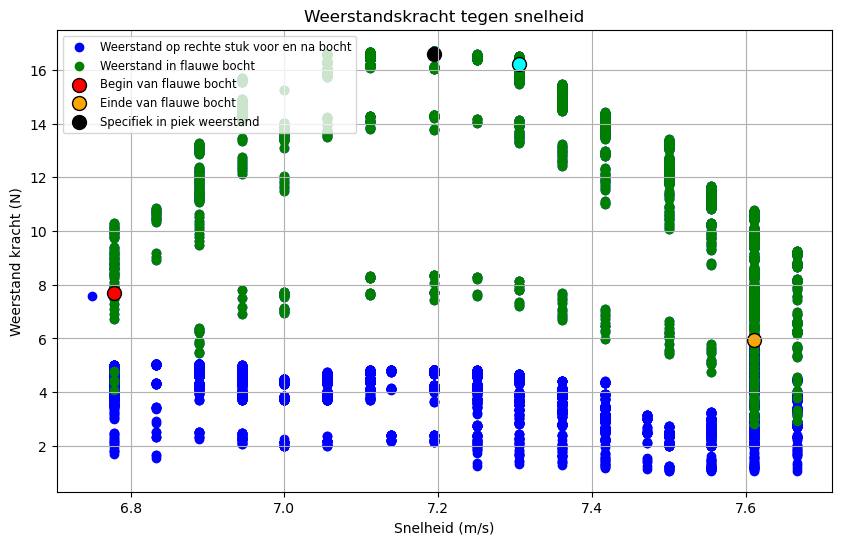

In [123]:
import matplotlib.pyplot as plt
#Met GPS snelheid

df_e_kin = df_e_kin[(df_combined['Weerstand (N)'] >= 0) & (df_combined['Weerstand (N)'] <= 20)]
df_e_kin = df_e_kin[(df_combined['Weerstand met GPS Snelheid (N)'] >= 0) & (df_combined['Weerstand met GPS Snelheid (N)'] <= 20)]

# Eerst, laten we de data voor de specifieke index range voorbereiden
specifieke_indices = df_combined.loc[388565:390150]

plt.figure(figsize=(10, 6))

# Teken alle punten in blauw
plt.scatter(df_combined["Gemeten_snelheden_GPS (m/s)"], df_combined['Weerstand (N)'],
            label='Weerstand op rechte stuk voor en na bocht', color='b')

# Teken nu de specifieke punten in het groen
plt.scatter(specifieke_indices["Gemeten_snelheden_GPS (m/s)"], specifieke_indices['Weerstand (N)'],
            color='green', label='Weerstand in flauwe bocht')

# Markeer het beginpunt met rood
plt.scatter(df_combined.loc[388565, "Gemeten_snelheden_GPS (m/s)"], df_combined.loc[388565, 'Weerstand (N)'],
            color='red', label='Begin van flauwe bocht', s=100, edgecolor='black')

# Markeer het eindpunt met oranje
plt.scatter(df_combined.loc[390150, "Gemeten_snelheden_GPS (m/s)"], df_combined.loc[390150, 'Weerstand (N)'],
            color='orange', label='Einde van flauwe bocht', s=100, edgecolor='black')

# Markeer een ander specifiek punt met cyan
plt.scatter(df_combined.loc[389221, "Gemeten_snelheden_GPS (m/s)"], df_combined.loc[389221, 'Weerstand (N)'],
            color='cyan', label='Specifiek in piek weerstand', s=100, edgecolor='black')

plt.scatter(df_combined.loc[389141, "Gemeten_snelheden_GPS (m/s)"], df_combined.loc[389141, 'Weerstand (N)'],
            color='black', label='Specifiek in piek weerstand', s=100, edgecolor='black')



plt.title('Weerstandskracht tegen snelheid')
plt.xlabel('Snelheid (m/s)')
plt.ylabel('Weerstand kracht (N)')
plt.grid(True)

# We passen de legenda aan zodat elk label maar één keer verschijnt
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Verwijder duplicaten

# Pas de legenda aan: kleinere lettergrootte en plaatsing linksboven
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize='small')

plt.show()


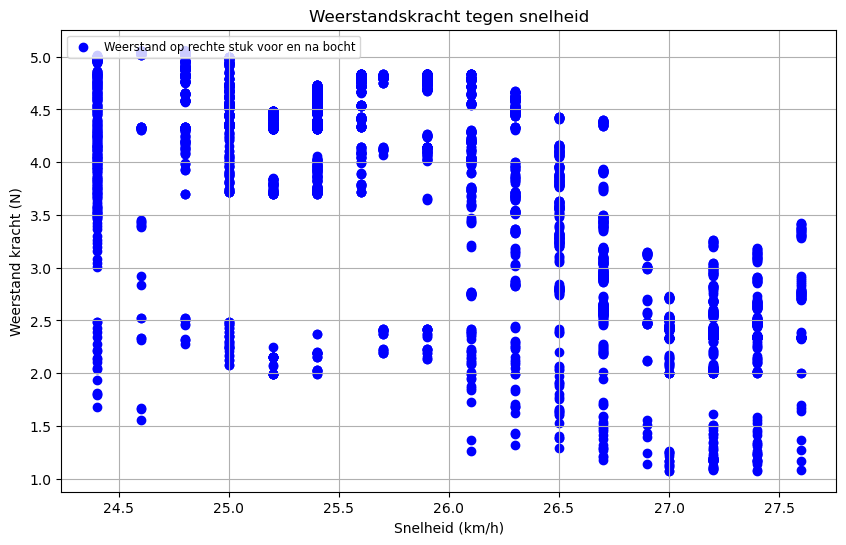

In [134]:
import matplotlib.pyplot as plt
#Met GPS snelheid

df_e_kin = df_e_kin[(df_e_kin['Weerstand (N)'] >= 0) & (df_e_kin['Weerstand (N)'] <= 20)]
df_e_kin = df_e_kin[(df_e_kin['Weerstand met GPS Snelheid (N)'] >= 0) & (df_e_kin['Weerstand met GPS Snelheid (N)'] <= 20)]

df_rechte_stuk = df_e_kin.loc[390500:]

# Eerst, laten we de data voor de specifieke index range voorbereiden
specifieke_indices = df_e_kin.loc[388565:390150]

plt.figure(figsize=(10, 6))

# Teken alle punten in blauw
plt.scatter(df_rechte_stuk["Gemeten_snelheden_GPS (m/s)"]*3.6, df_rechte_stuk['Weerstand (N)'],
            label='Weerstand op rechte stuk voor en na bocht', color='b')

# # Teken nu de specifieke punten in het groen
# plt.scatter(specifieke_indices["Gemeten_snelheden_GPS (m/s)"], specifieke_indices['Weerstand (N)'],
#             color='green', label='Weerstand in flauwe bocht')
# 
# # Markeer het beginpunt met rood
# plt.scatter(df_e_kin.loc[388565, "Gemeten_snelheden_GPS (m/s)"], df_e_kin.loc[388565, 'Weerstand (N)'],
#             color='red', label='Begin van flauwe bocht', s=100, edgecolor='black')
# 
# # Markeer het eindpunt met oranje
# plt.scatter(df_e_kin.loc[390150, "Gemeten_snelheden_GPS (m/s)"], df_e_kin.loc[390150, 'Weerstand (N)'],
#             color='orange', label='Einde van flauwe bocht', s=100, edgecolor='black')
# 
# # Markeer een ander specifiek punt met cyan
# plt.scatter(df_e_kin.loc[389221, "Gemeten_snelheden_GPS (m/s)"], df_e_kin.loc[389221, 'Weerstand (N)'],
#             color='cyan', label='Specifiek in piek weerstand', s=100, edgecolor='black')
# 
# plt.scatter(df_e_kin.loc[389141, "Gemeten_snelheden_GPS (m/s)"], df_e_kin.loc[389141, 'Weerstand (N)'],
#             color='black', label='Specifiek in piek weerstand', s=100, edgecolor='black')



plt.title('Weerstandskracht tegen snelheid')
plt.xlabel('Snelheid (km/h)')
plt.ylabel('Weerstand kracht (N)')
plt.grid(True)

# We passen de legenda aan zodat elk label maar één keer verschijnt
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Verwijder duplicaten

# Pas de legenda aan: kleinere lettergrootte en plaatsing linksboven
plt.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize='small')

plt.show()


In [129]:
df_e_kin

Afgelegde afstand (m)  Gemeten_snelheden_GPS (m/s)  \
388562               10512.22                     6.750000   
388564               10512.35                     6.777778   
388565               10512.41                     6.777778   
388566               10512.47                     6.777778   
388567               10512.53                     6.777778   
...                       ...                          ...   
394857               10914.23                     6.833333   
394859               10914.36                     6.833333   
394861               10914.48                     6.833333   
394863               10914.60                     6.833333   
394865               10914.67                     6.833333   

        Gemeten Snelheid (m/s)  Kinetische Energie (J)  \
388562                6.845278             2108.602253   
388564                6.848056             2110.313920   
388565                6.861944             2118.882670   
388566                6.845833             2108.944531   
388567                6.888611             2135.383337   
...                        ...                     ...   
394857                6.787500             2073.157031   
394859                6.790556             2075.024014   
394861                6.776944             2066.713920   
394863                6.768889             2061.803556   
394865                6.761389             2057.237087   

        Kinetische Energie met GPS snelheid (J)  \
388562                              2050.312500   
388564                              2067.222222   
388565                              2067.222222   
388566                              2067.222222   
388567                              2067.222222   
...                                         ...   
394857                              2101.250000   
394859                              2101.250000   
394861                              2101.250000   
394863                              2101.250000   
394865                              2101.250000   

        Potentiële Energie Totaal (J)  Totale Energie (J)  \
388562                    4722.982520         6831.584773   
388564                    4722.070545         6832.384465   
388565                    4721.610696         6840.493366   
388566                    4721.148283         6830.092814   
388567                    4720.683314         6856.066651   
...                               ...                 ...   
394857                    2363.298364         4436.455395   
394859                    2362.892754         4437.916768   
394861                    2362.489433         4429.203353   
394863                    2362.088419         4423.891974   
394865                    2361.689728         4418.926815   

        Totale Energie met GPS snelheid (J)  \
388562                          6773.295020   
388564                          6789.292767   
388565                          6788.832918   
388566                          6788.370505   
388567                          6787.905536   
...                                     ...   
394857                          4464.548364   
394859                          4464.142754   
394861                          4463.739433   
394863                          4463.338419   
394865                          4462.939728   

        Totale theoretische Energie met GPS snelheid (J)  \
388562                                       6824.687218   
388564                                       6824.692369   
388565                                       6824.694933   
388566                                       6824.697489   
388567                                       6824.700038   
...                                                  ...   
394857                                       6824.435610   
394859                                       6824.434468   
394861                                       6824.433317   
394863                                       6824.43215

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Remove rows where acceleration, speed, or resistance is NaN or infinite
df_combined = df_combined[(df_combined['Weerstand (N)'] >= 0) & (df_combined['Weerstand (N)'] <= 20)]
df_combined = df_combined[(df_combined['Weerstand met GPS Snelheid (N)'] >= 0) & (df_combined['Weerstand met GPS Snelheid (N)'] <= 20)]
df_combined = df_combined.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
df_combined = df_combined.dropna(subset=['Weerstand met GPS Snelheid (N)', 'Weerstand (N)'])  # Drop rows with NaN in these columns

# Prepare the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set up the latitude-longitude plot
ax1.set_ylim(df_combined['GPS latitude, in graden'].min() - 0.00001, df_combined['GPS latitude, in graden'].max() + 0.0001)
ax1.set_xlim(df_combined['GPS longitude, in graden'].min() - 0.00001, df_combined['GPS longitude, in graden'].max() + 0.00001)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Latitude and Longitude with Acceleration Coloring")

# Set up the speed comparison plot
ax2.set_xlim(df_combined['GPS speed, in km/h'].min() - 1, 
             df_combined['GPS speed, in km/h'].max() + 1)
ax2.set_ylim(df_combined['Weerstand met GPS Snelheid (N)'].min() - 5, 
             df_combined['Weerstand met GPS Snelheid (N)'].max() + 5)
ax2.set_xlabel("GPS speed, in km/h")
ax2.set_ylabel("Weerstand met GPS Snelheid (N)")
ax2.set_title("Weerstand tegen snelheid")

# Initialize scatter plots
scat1 = ax1.scatter([], [], alpha=0.7)
scat2 = ax2.scatter([], [], alpha=0.7)

# Add a legend for acceleration categories
legend_labels = [
    ('red', 'Voor bocht'),
    ('blue', 'In bocht'),
    ('yellow', 'Na bocht')
]
for color, label in legend_labels:
    ax2.scatter([], [], color=color, label=label)  # Dummy points for legend
ax2.legend(title="Kleurenlegenda", loc='upper left')

# Define the update function
def update(frame):
    end = frame + 1  # Display one additional row per frame
    if end > len(df_combined):  # Stop when all data is shown
        return

    # Extract data chunk
    chunk = df_combined.iloc[:end]  # Include all data up to the current frame
    
    # Determine colors for acceleration
    colors = chunk.index.map(
    lambda i: 'red' if i < 388565 else ('blue' if i <= 390150 else 'yellow'))

    # Update the latitude-longitude scatter plot
    # Update de GPS-plot
    chunk_lon = chunk['GPS longitude, in graden']
    chunk_lat = chunk['GPS latitude, in graden']
    scat1.set_offsets(np.column_stack((chunk_lon, chunk_lat)))
    scat1.set_color(colors)

    
    # Update the speed comparison plot
    scat2.set_offsets(np.column_stack((chunk['GPS speed, in km/h'],
                                        chunk['Weerstand met GPS Snelheid (N)'])))
    scat2.set_color(colors)

    return scat1, scat2

# Stel de animatie in
frames_count = len(df_combined)
anim = FuncAnimation(fig, update, frames=frames_count, repeat=False, interval=5, blit=True) #with 50ms per frame

# Custom dark mode CSS
dark_mode_css = """
<style>
    body {
        background-color: #121212;
        color: white;
    }
    .animation-container {
        background-color: #121212;
        border: 2px solid #ffffff;
        border-radius: 10px;
        padding: 20px;
    }   
</style>
"""

# Save as an HTML file
output_path = "dynamic_lat_lon_weerstand.html"
from matplotlib.animation import HTMLWriter
html_writer = HTMLWriter()
anim.save(output_path, writer=html_writer, dpi=80)

# Append the dark mode CSS to the HTML
with open(output_path, 'a') as f:
    f.write(dark_mode_css)

print(f"Animation saved as {output_path} with dark mode")

Animatie opgeslagen als dynamic_lat_lon_weerstand_recht_stuk_iets_langer.html.


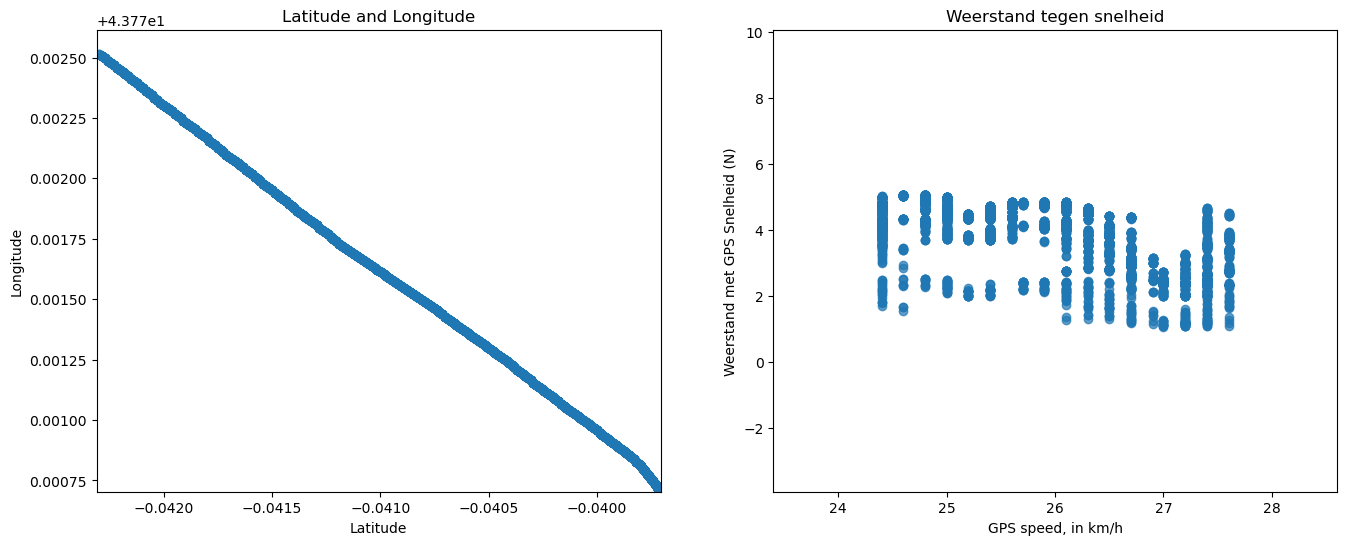

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Filter alles boven 20N weg
df_combined = df_combined[(df_combined['Weerstand (N)'] >= 0) & (df_combined['Weerstand (N)'] <= 20)]
df_combined = df_combined[(df_combined['Weerstand met GPS Snelheid (N)'] >= 0) & (df_combined['Weerstand met GPS Snelheid (N)'] <= 20)]
# Verwijder rijen met NaN of oneindige waarden in de relevante kolommen
df_combined = df_combined.replace([np.inf, -np.inf], np.nan)
df_combined = df_combined.dropna(subset=['Weerstand met GPS Snelheid (N)', 'Weerstand (N)'])

# Filter de DataFrame om alleen gegevens vanaf index 390500 op te nemen
animatie_rechtstuk = df_combined.loc[390300:]

# Bereid de figuur voor
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Instellingen voor de latitude-longitude plot
ax1.set_ylim(animatie_rechtstuk['GPS latitude, in graden'].min() - 0.00001, animatie_rechtstuk['GPS latitude, in graden'].max() + 0.0001)
ax1.set_xlim(animatie_rechtstuk['GPS longitude, in graden'].min() - 0.00001, animatie_rechtstuk['GPS longitude, in graden'].max() + 0.00001)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Latitude and Longitude")

# Instellingen voor de snelheid-weerstand plot
ax2.set_xlim(animatie_rechtstuk['GPS speed, in km/h'].min() - 1, animatie_rechtstuk['GPS speed, in km/h'].max() + 1)
ax2.set_ylim(animatie_rechtstuk['Weerstand met GPS Snelheid (N)'].min() - 5, animatie_rechtstuk['Weerstand met GPS Snelheid (N)'].max() + 5)
ax2.set_xlabel("GPS speed, in km/h")
ax2.set_ylabel("Weerstand met GPS Snelheid (N)")
ax2.set_title("Weerstand tegen snelheid")

# Initialiseer scatter plots
scat1 = ax1.scatter([], [], alpha=0.7)
scat2 = ax2.scatter([], [], alpha=0.7)

# Definieer de updatefunctie
def update(frame):
    end = frame + 1  # Toon één extra rij per frame
    if end > len(animatie_rechtstuk):  # Stop wanneer alle data is weergegeven
        return scat1, scat2

    # Haal het huidige datachunk op
    chunk = animatie_rechtstuk.iloc[:end]

    # Update de GPS-plot
    chunk_lon = chunk['GPS longitude, in graden']
    chunk_lat = chunk['GPS latitude, in graden']
    scat1.set_offsets(np.column_stack((chunk_lon, chunk_lat)))

    # Update de snelheid-weerstand plot
    scat2.set_offsets(np.column_stack((chunk['GPS speed, in km/h'],
                                       chunk['Weerstand met GPS Snelheid (N)'])))

    return scat1, scat2

# Stel de animatie in
frames_count = len(animatie_rechtstuk)
anim = FuncAnimation(fig, update, frames=frames_count, repeat=False, interval=50, blit=True)

# Sla op als MP4-bestand
output_path = "dynamic_lat_lon_weerstand_recht_stuk_iets_langer.html"
html_writer = HTMLWriter()
anim.save(output_path, writer=html_writer, dpi=80)

print(f"Animatie opgeslagen als {output_path}.")    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

df_combined = df_meetstuk5
# Remove rows where acceleration, speed, or resistance is NaN or infinite
#df_combined = df_combined[(df_combined['Weerstand (N)'] >= 0) & (df_combined['Weerstand (N)'] <= 20)]
df_combined = df_combined[(df_combined['Weerstand met GPS Snelheid (N)'] >= 0) & (df_combined['Weerstand met GPS Snelheid (N)'] <= 20)]
df_combined = df_combined.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
df_combined = df_combined.dropna(subset=['Weerstand met GPS Snelheid (N)'])  # Drop rows with NaN in these columns

# Prepare the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set up the latitude-longitude plot
ax1.set_ylim(df_combined['GPS latitude, in graden'].min() - 0.00001, df_combined['GPS latitude, in graden'].max() + 0.0001)
ax1.set_xlim(df_combined['GPS longitude, in graden'].min() - 0.00001, df_combined['GPS longitude, in graden'].max() + 0.00001)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Latitude and Longitude with Acceleration Coloring")

# Set up the speed comparison plot
ax2.set_xlim(df_combined['GPS speed, in km/h'].min() - 1, 
             df_combined['GPS speed, in km/h'].max() + 1)
ax2.set_ylim(df_combined['Weerstand met GPS Snelheid (N)'].min() - 5, 
             df_combined['Weerstand met GPS Snelheid (N)'].max() + 5)
ax2.set_xlabel("GPS speed, in km/h")
ax2.set_ylabel("Weerstand met GPS Snelheid (N)")
ax2.set_title("Weerstand tegen snelheid")

# Initialize scatter plots
scat1 = ax1.scatter([], [], alpha=0.7)
scat2 = ax2.scatter([], [], alpha=0.7)

# Add a legend for acceleration categories
legend_labels = [
    ('red', 'Voor bocht'),
    ('blue', 'In bocht'),
    ('yellow', 'Na bocht')
]
for color, label in legend_labels:
    ax2.scatter([], [], color=color, label=label)  # Dummy points for legend
ax2.legend(title="Kleurenlegenda", loc='upper left')

# Define the update function
def update(frame):
    end = frame + 1  # Display one additional row per frame
    if end > len(df_combined):  # Stop when all data is shown
        return

    # Extract data chunk
    chunk = df_combined.iloc[:end]  # Include all data up to the current frame
    
    # Determine colors for acceleration
    colors = chunk.index.map(
    lambda i: 'red' if i < 388565 else ('blue' if i <= 390150 else 'yellow'))

    # Update the latitude-longitude scatter plot
    # Update de GPS-plot
    chunk_lon = chunk['GPS longitude, in graden']
    chunk_lat = chunk['GPS latitude, in graden']
    scat1.set_offsets(np.column_stack((chunk_lon, chunk_lat)))
    scat1.set_color(colors)

    
    # Update the speed comparison plot
    scat2.set_offsets(np.column_stack((chunk['GPS speed, in km/h'],
                                        chunk['Weerstand met GPS Snelheid (N)'])))
    scat2.set_color(colors)

    return scat1, scat2

# Stel de animatie in
frames_count = len(df_combined)
anim = FuncAnimation(fig, update, frames=frames_count, repeat=False, interval=5, blit=True) #with 50ms per frame

# Custom dark mode CSS
dark_mode_css = """
<style>
    body {
        background-color: #121212;
        color: white;
    }
    .animation-container {
        background-color: #121212;
        border: 2px solid #ffffff;
        border-radius: 10px;
        padding: 20px;
    }   
</style>
"""

# Save as an HTML file
output_path = "dynamic_lat_lon_weerstand5.html"
from matplotlib.animation import HTMLWriter
html_writer = HTMLWriter()
anim.save(output_path, writer=html_writer, dpi=80)

# Append the dark mode CSS to the HTML
with open(output_path, 'a') as f:
    f.write(dark_mode_css)

print(f"Animation saved as {output_path} with dark mode")